In [7436]:
# Entregable 1

In [7437]:
#Importo las librerías con las que voy a trabajar
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold
from numpy.lib.histograms import histogram
from datetime import datetime, timedelta


## Lectura de Data Frame

In [7438]:
# Leo el dataframe para traerlo y trabajar con él
df_bmw = pd.read_csv('bmw_pricing_v3.csv', index_col = False)
pd.set_option('display.max_rows', 15)
df_bmw

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01


## Información del Data Frame

In [7439]:
#Averiguo más información acerca del DataFrame, datos nulos,
#el tipo de datos de cada columna. El dataframe inicial contiene 18 variables
# en total: 14 son categóricas, 3 son floats y 1 es boolean
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [7440]:
# resumen estadístico de las columnas numéricas de un 
# DataFrame o una Serie. Al llamar a describe(), 
# se calculan varias estadísticas descriptivas, como 
# el recuento de valores no nulos, la media, la 
# desviación estándar, los valores mínimo y máximo, y 
# los percentiles (25%, 50%, y 75%). 
df_bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [7441]:
#Con este comando leo las primeras columnas del Data Frame
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [7442]:
# Con este comando averiguo la extensión del DataFrame.
# En este caso, tiene 4843 filas y 18 columnas
df_bmw.shape

(4843, 18)

In [7443]:
# Con un dtyppe devuelvo los tipos específicos de cada variable, me sirve
# para luego crear una lista con tipo de variables.
df_bmw['marca'].dtype

dtype('O')

In [7444]:
# Otra manera de devolver el tipo de la variable
type(df_bmw['volante_regulable'].iloc[0])

bool

## Busco duplicados

In [7445]:
# Busco duplicados entre los datos. Utilizo el keep = false
# para obtener todas las filas duplicadas en el DataFrame
# sin importar si son la primera o última aparición de los
#  valores que están duplicados
df_bmw[df_bmw.duplicated(keep=False)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [7446]:
#Creo una copia para resguardarme y no sobreescribir
# información
df_bmw1 = df_bmw.copy()

## Busco nulos entre los datos

In [7447]:
# Paso siguiente, averiguo si hay algún valor nulo (Nan)
# en cada columna del DataFrame. Me devolverá una serie
# de booleanos indicando si cada columna contiene valores
# nulos o no (True or False)
df_bmw1.isnull().any()

marca                    True
modelo                   True
km                       True
potencia                 True
fecha_registro           True
                        ...  
bluetooth                True
gps                     False
alerta_lim_velocidad     True
precio                   True
fecha_venta              True
Length: 18, dtype: bool

In [7448]:
# Con este comando calculo el número de valores perdidos
# (valores nulos o NaN) en cada columna del DataFrame.
# El resultado me devolverá una serie que muestra la suma
# de valores perdidos para cada columna
df_bmw1.isnull().sum()

marca                    970
modelo                     3
km                         2
potencia                   1
fecha_registro          2423
                        ... 
bluetooth                728
gps                        0
alerta_lim_velocidad     728
precio                     6
fecha_venta                1
Length: 18, dtype: int64

In [7449]:
# Creo una variable con la lista de columnas para realizar
# una comparación posterior entre cantidad de nulos
# y proporción de nulos dentro de cada columna
columnas = list(df_bmw1.columns)

In [7450]:
# Creo una variable con la cantidad total de nulos totales
# por de columnas para realizar una comparación posterior
# entre cantidad de nulos y proporción de nulos dentro
# de cada columna
valores_nulos = df_bmw1.isnull().sum()

In [7451]:
df_bmw1.isnull().sum()/len(df_bmw1)

marca                   0.200289
modelo                  0.000619
km                      0.000413
potencia                0.000206
fecha_registro          0.500310
                          ...   
bluetooth               0.150320
gps                     0.000000
alerta_lim_velocidad    0.150320
precio                  0.001239
fecha_venta             0.000206
Length: 18, dtype: float64

In [7452]:
# Creo una variable con la cantidad total de nulos totales
# por de columnas para realizar una comparación posterior
# entre cantidad de nulos y proporción de nulos dentro
#  de cada columna
porcentaje_nulos = df_bmw1.isnull().sum()/len(df_bmw1)

In [7453]:
# Mediante un diccionario, utilizo las variables creadas anteriormente y le 
# agrego las llaves para identificar los valores. Con este código, y también
# utilizando el "sort_values(ascending=False)", lo que estoy buscando es que
# me muestre tanto los valores nulos como la proporción de nulos por columna
# en orden descendente
val_y_prop = pd.DataFrame({'Valores Nulos': valores_nulos, 'Proporción de nulos': porcentaje_nulos})
val_y_prop = val_y_prop.sort_values('Proporción de nulos', ascending=False)

In [7454]:
print(val_y_prop.round(4))

                             Valores Nulos  Proporción de nulos
asientos_traseros_plegables           3391               0.7002
fecha_registro                        2423               0.5003
tipo_coche                            1460               0.3015
marca                                  970               0.2003
alerta_lim_velocidad                   728               0.1503
...                                    ...                  ...
elevalunas_electrico                     2               0.0004
km                                       2               0.0004
potencia                                 1               0.0002
fecha_venta                              1               0.0002
gps                                      0               0.0000

[18 rows x 2 columns]


In [7455]:
# Hago otra copia para asegurarme
df_bmw2 = df_bmw1.copy()

In [7456]:
df_bmw2.dtypes

marca                    object
modelo                   object
km                      float64
potencia                float64
fecha_registro           object
                         ...   
bluetooth                object
gps                        bool
alerta_lim_velocidad     object
precio                  float64
fecha_venta              object
Length: 18, dtype: object

## Análisis columna por columna

In [7457]:
# Comienzo entonces el análisis columna por columna en orden
# descendente. Como puede observarse, hay 8 variables con un
# porcentaje elevado de observaciones nulas, aproximadamente
# mayor al 9%. De las 10 variables restantes, 9 tienen baja
# proporción de nulos y la variable "gps" no contiene NaN
print(val_y_prop.round(4))

                             Valores Nulos  Proporción de nulos
asientos_traseros_plegables           3391               0.7002
fecha_registro                        2423               0.5003
tipo_coche                            1460               0.3015
marca                                  970               0.2003
alerta_lim_velocidad                   728               0.1503
...                                    ...                  ...
elevalunas_electrico                     2               0.0004
km                                       2               0.0004
potencia                                 1               0.0002
fecha_venta                              1               0.0002
gps                                      0               0.0000

[18 rows x 2 columns]


In [7458]:
df_bmw3 = df_bmw2.copy()

In [7459]:
# Aquí analizo el máximo y mínimo de nulos por fila. Podemos
# observar que la mayor cantidad de nulos por filas es de 6,
# lo cual se repite 10 veces en todo el dataframe. Por lo tanto
# podemos intuir que no serça necesario eliminar filas completas del dataset
print('Máximo de NaN por fila: ', df_bmw3.isnull().sum(axis=1).max(), '\n'
      'Mínimo de NaN por fila: ', (df_bmw3.isnull().sum(axis=1) == 6).count())
filas_con_6_nulos = ((df_bmw3.isnull().sum(axis=1) == 6).astype(int)).sum()
print('Cantidad de veces que se repite el máximo de 6 filas con nulos:', filas_con_6_nulos)

Máximo de NaN por fila:  6 
Mínimo de NaN por fila:  4843
Cantidad de veces que se repite el máximo de 6 filas con nulos: 10


In [7460]:
# La columna "asientos_traseros_plegables"
# contiene 3391 valores nulos, lo que representa (según
# la proporción calculada anteriormente) el 70% del
# total de las observaciones
df_bmw3['asientos_traseros_plegables'].value_counts(dropna=False)

asientos_traseros_plegables
NaN      3391
False    1150
True      302
Name: count, dtype: int64

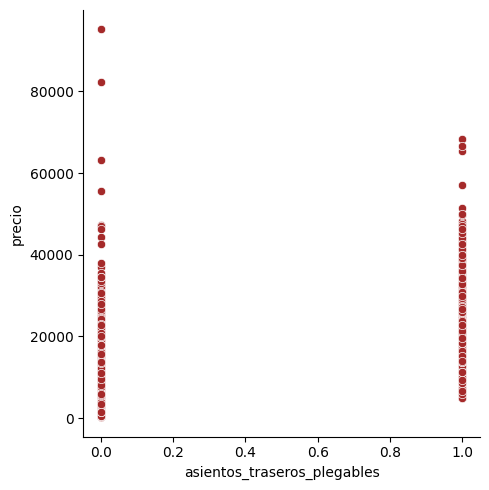

In [7461]:
# Tomando en consideración que nuestro objetivo o "target"
# es el precio, mediante un gráfico de
# dispersión o scatterplot, verifico si efectivamente hay alguna 
# relación entre los asientos_traseros_plegables
# y el precio. A priori puede observarse que no hay una
# relación muy clara o la dispersión de los puntos
# es muy altatoria, por lo tanto es poco probable que
# la variable tenga un impacto significativo en el precio 
# df_bmw3.dropna(subset='asientos_traseros_plegables', inplace=True)
sns.relplot(x=df_bmw3['asientos_traseros_plegables'], y=df_bmw2['precio'], 
            data=df_bmw3,  kind='scatter', color='brown') 

In [7462]:
# Dado que la proporción de valores nulos es alta, 
# considero eliminar esta columna, ya que es poco probable
# que los asientos_traseros_plegables tengan un impacto
# significativo en el precio del automóvil
del df_bmw3['asientos_traseros_plegables']

In [7463]:
# Corroboro que efectivamente haya eliminado la columna
# "asientos_traseros_plegables"
df_bmw3.columns

Index(['marca', 'modelo', 'km', 'potencia', 'fecha_registro', 'tipo_gasolina',
       'color', 'tipo_coche', 'volante_regulable', 'aire_acondicionado',
       'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'gps',
       'alerta_lim_velocidad', 'precio', 'fecha_venta'],
      dtype='object')

In [7464]:
# La columna "fecha_registro" contiene 2423 valores nulos, 
# lo que representa (según la proporción calculada 
# anteriormente) el 50% del total de las observaciones
df_bmw3['fecha_registro'].value_counts(dropna=False)

fecha_registro
NaN           2423
2013-07-01      93
2014-03-01      83
2014-05-01      81
2013-01-01      78
              ... 
2007-01-01       1
1990-03-01       1
2006-11-01       1
1994-01-01       1
2005-09-01       1
Name: count, Length: 181, dtype: int64

In [7465]:
df_bmw3['fecha_registro'] = pd.to_datetime(df_bmw3['fecha_registro'])
mediana_fecha_registro = df_bmw3['fecha_registro'].median()

# Aquí relleno los valores faltantes (NaN) con la mediana, ya que es el valor 
# central o representativo de la distribución de los datos existentes y
#  no se ve afectada por los valores atípicos,
df_bmw3['fecha_registro'] = df_bmw3['fecha_registro'].fillna(mediana_fecha_registro)

# Verifica los conteos de valores en la columna 'fecha_registro'
conteo_fecha_registro = df_bmw3['fecha_registro'].value_counts(dropna=False)
print(conteo_fecha_registro)

fecha_registro
2013-07-01    2516
2014-03-01      83
2014-05-01      81
2013-01-01      78
2013-10-01      77
              ... 
2007-01-01       1
1990-03-01       1
2006-11-01       1
1994-01-01       1
2005-09-01       1
Name: count, Length: 180, dtype: int64


In [7466]:
# La columna "fecha_registro" contiene 2423 valores nulos, 
# lo que representa (según la proporción calculada 
# anteriormente) el 0.5 del total de las observaciones
df_bmw3['fecha_venta'].value_counts(dropna=False)

fecha_venta
2018-05-01    809
2018-03-01    738
2018-04-01    691
2018-06-01    603
2018-07-01    537
2018-08-01    527
2018-02-01    502
2018-09-01    223
2018-01-01    208
2007-08-01      1
2010-04-01      1
2009-04-01      1
2008-06-01      1
NaN             1
Name: count, dtype: int64

In [7467]:
df_bmw3['fecha_venta'] = pd.to_datetime(df_bmw3['fecha_venta'])
moda_fecha_venta = df_bmw3['fecha_venta'].mode()

# Relleno los valores faltantes (NaN) con la moda, porque es el valor que más se repite
# y en este caso al tener un solo NaN, nos conviene hacerlo de esya manera
df_bmw3['fecha_venta'] = df_bmw3['fecha_venta'].fillna(moda_fecha_venta)

# Aquí quiero verificar los conteos de valores en la columna 'fecha_registro'
conteo_fecha_venta = df_bmw3['fecha_venta'].value_counts(dropna=False)
print(conteo_fecha_venta)

fecha_venta
2018-05-01    809
2018-03-01    738
2018-04-01    691
2018-06-01    603
2018-07-01    537
2018-08-01    527
2018-02-01    502
2018-09-01    223
2018-01-01    208
2007-08-01      1
2010-04-01      1
2009-04-01      1
2008-06-01      1
NaT             1
Name: count, dtype: int64


### Creación de nueva variable

In [7468]:
# Creo una nueva variable "diferencia" para conocer la cantidad
# de tiempo que pasó entre la venta y el registro. Ello me dará información  útil para calcular la media de esta diferencia y rellenar valores nulos.
# Calcular la diferencia de tiempo en días

df_bmw3['fecha_venta'] = pd.to_datetime(df_bmw3['fecha_venta'])
df_bmw3['fecha_registro'] = pd.to_datetime(df_bmw3['fecha_registro'])

# Calcular la diferencia de tiempo en días
diferencia = (df_bmw3['fecha_venta'] - df_bmw3['fecha_registro']).dt.days
# Convierto diferencia a tipo numérico para poder operar más 
# fácil posteriormente
df_bmw3['diferencia'] = pd.to_numeric(diferencia, errors='coerce')
# Calculo la media para poder utilizarla luego con un fillna
media_diferencia_tiempo = df_bmw3['diferencia'].mean(skipna=True)
media_dif_tiempo_redon = round(media_diferencia_tiempo, 0)

print(media_dif_tiempo_redon)

1864.0


In [7469]:
# Convierto diferencia a tipo numérico para poder operar más 
# fácil posteriormente
df_bmw3['diferencia'] = pd.to_numeric(diferencia, errors='coerce')

In [7470]:
df_bmw3['diferencia'].fillna(media_dif_tiempo_redon, inplace=True)
df_bmw3

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,diferencia
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0,2018-01-01,2161.0
1,BMW,M4,13929.0,317.0,2013-07-01,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01,1676.0
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,2018-02-01,2132.0
3,BMW,420,128035.0,135.0,2013-07-01,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,2018-02-01,1676.0
4,BMW,425,97097.0,160.0,2013-07-01,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0,2018-04-01,1735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743.0,110.0,2013-07-01,diesel,black,NaN,False,True,False,False,False,True,False,14600.0,2018-08-01,1857.0
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,False,False,True,True,17500.0,2018-08-01,1157.0
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,True,True,17000.0,2018-09-01,1066.0
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,True,True,22700.0,2018-09-01,883.0


In [7471]:
# Verifico si la columna 'diferencia' tiene valores negativos
# Como no me permite comparar objetos "timedelta" y enteros, tengo que 
# adaptar el código con un "pd.Timedelta(0)"
dif_negativos = df_bmw3.loc[df_bmw3['diferencia'] < 0]
print(dif_negativos)


    marca modelo        km  potencia fecha_registro tipo_gasolina  color   
42    BMW    330  142483.0     180.0     2013-07-01        diesel   blue  \
100   BMW    320  342768.0     135.0     2011-12-01        diesel  black   
180   BMW    320  181052.0     120.0     2013-07-01        diesel  black   
256   BMW    316  201102.0      85.0     2013-12-01        diesel  black   

      tipo_coche volante_regulable aire_acondicionado camara_trasera   
42   convertible              True               True          False  \
100          NaN             False               True          False   
180       estate             False               True          False   
256       estate              True                NaN          False   

    elevalunas_electrico bluetooth   gps alerta_lim_velocidad   precio   
42                  True     False  True                 True  15800.0  \
100                 True     False  True                  NaN   8200.0   
180                False     False  

## Reemplazo valores negativos

In [7472]:
# Reemplazo los valores negativos con la media de la diferencia
df_bmw3.loc[df_bmw3['diferencia'] < 0, 'diferencia'] = media_diferencia_tiempo
df_bmw3


,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,diferencia
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0,2018-01-01,2161.0
1,BMW,M4,13929.0,317.0,2013-07-01,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01,1676.0
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,2018-02-01,2132.0
3,BMW,420,128035.0,135.0,2013-07-01,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,2018-02-01,1676.0
4,BMW,425,97097.0,160.0,2013-07-01,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0,2018-04-01,1735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743.0,110.0,2013-07-01,diesel,black,NaN,False,True,False,False,False,True,False,14600.0,2018-08-01,1857.0
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,False,False,True,True,17500.0,2018-08-01,1157.0
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,True,True,17000.0,2018-09-01,1066.0
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,True,True,22700.0,2018-09-01,883.0


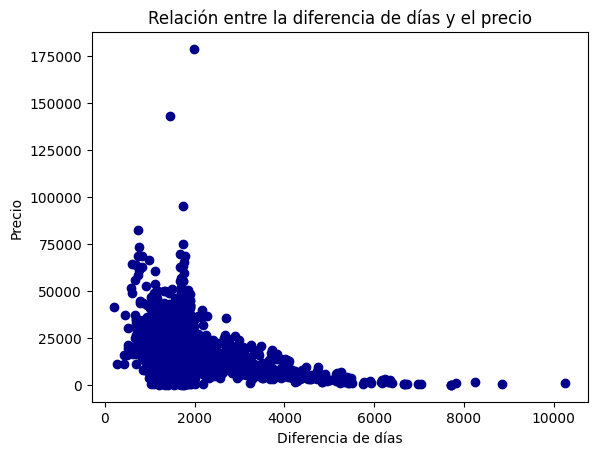

In [7473]:
# Tomando en consideración que nuestro objetivo o "target"
# es el precio, mediante un gráfico de
# dispersión o scatterplot, verifico si efectivamente hay alguna 
# relación entre la df_bmw3['diferencia] que creé, es decir,
# la diferencia de días entre el registro y la venta del vehículo
# y el precio del mismo A priori puede observarse que hay una
# relación entre ambas. En otras palabras, parece ser que
# cuanto mayor es la diferencia de días (o más tiempo transucrrió
# entre el registro del auto y la venta), menor es el precio del vehículo.
# En definitiva, con el paso de los días el auto se va
# depreciando.
# Cabe destacar que ya fue incluida la media de los días que transcurrieron
# entre el registro y la venta en la variable diferencia, por ello
# puede verse representada en el gráfico cerca de los 2000 días
plt.scatter(df_bmw3['diferencia'], df_bmw3['precio'], color='darkblue')
plt.xlabel('Diferencia de días')
plt.ylabel('Precio')
plt.title('Relación entre la diferencia de días y el precio')
plt.show()

### Elimino columnas

In [7474]:
# Dado que ya creé una variable nueva a partir de dos columnas
# con fechas, me dispongo a eliminar estas columnas puesto que no me
# servirán para el modelo posterior
del df_bmw3['fecha_registro']
del df_bmw3['fecha_venta']

In [7475]:
# Comienzo el análisis del tipo coche. En total la columna 
# posee 1460 NaN, lo que representa (según la proporción
# que calculamos anteriormente) el 30% de los valores
# totales de la columna "tipo_coche"
df_bmw3['tipo_coche'].isnull().value_counts()

tipo_coche
False    3383
True     1460
Name: count, dtype: int64

In [7476]:
df_bmw3['tipo_coche'].value_counts()

tipo_coche
estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: count, dtype: int64

<Axes: >

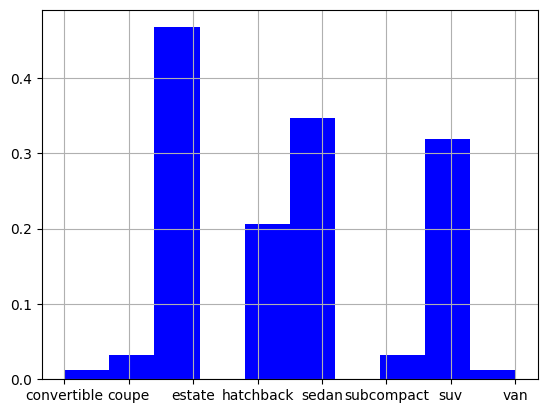

In [7477]:
# En el histograma podemos ponderar que hay tipos de coche que tienen mayor 
# frecuencia relativa, sobre el 20%.
df_bmw3['tipo_coche'].hist(density=True, color='blue')

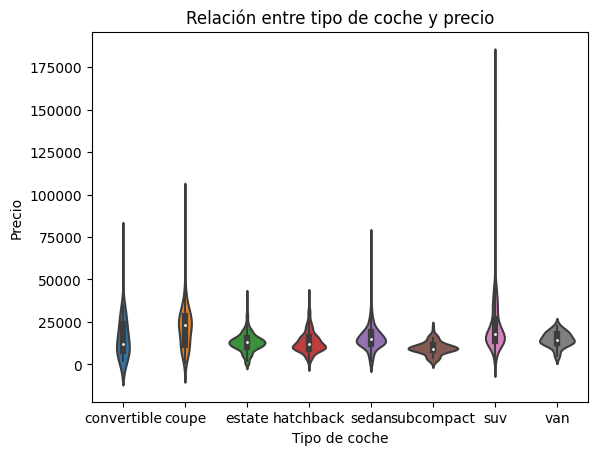

In [7478]:
# Tomando en consideración que nuestro objetivo o "target"
# es el precio, mediante un boxplot (adecuado para visualizar la
# distribución de una variable numérica para diferentes categorías), determino
# si efectivamente hay alguna relación entre el tipo de
# coche y el precio del vehículo. A priori puede observarse que hay relación
# en el tipo de coche y el precio (ciertos coches como la suv o coupé que parecen tener
# precios más elevados, mientras otros como el estate, el hatchback o el 
# subcompact parecen tener precios más bajos).
sns.violinplot(x=df_bmw3['tipo_coche'], y=df_bmw3['precio'])
plt.title('Relación entre tipo de coche y precio')
plt.xlabel('Tipo de coche')
plt.ylabel('Precio')
plt.show()

### Relleno datos nulos con string

In [7479]:
# Por ello, decido darle un tratamiento específico a la columna
# y considerar aquellos NaN como una categoría separada
# "desconocido" para no perder la información que puedan proporcionar esas 
# observaciones también porque mantenerlos no afecta el impacto de la 
# variable "tipo_coche" en la inferencia del precio.
df_bmw3['tipo_coche'].fillna('Desconocido', inplace=True)

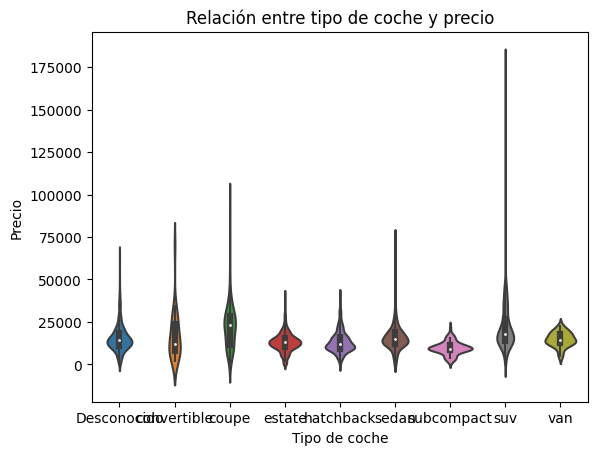

In [7480]:
# Genero otro violinplot para ver cómo se comportan
# los fillna "Desconocido" dentro de la columna
# "tipo_coche"
sns.violinplot(x=df_bmw3['tipo_coche'], y=df_bmw3['precio'])
plt.title('Relación entre tipo de coche y precio')
plt.xlabel('Tipo de coche')
plt.ylabel('Precio')
plt.show()

### Genero agrupaciones

In [7481]:
# Según la distribución de la columna, me interesa identificar aquellos valores 
# que tienen un recuento menor a 500 y reemplazarlos por el valor 'otros' en el
# dataframe df_bmw3. Quiero hacer esto para agrupar categorías poco frecuentes
# en una categoría más general.
count_coche = df_bmw3['tipo_coche'].value_counts(dropna=False)
otros_coches = count_coche[count_coche < 500].index.tolist()
df_bmw3['tipo_coche'] = df_bmw3['tipo_coche'].replace(otros_coches, 'otros')
print(df_bmw3['tipo_coche'])

0       Desconocido
1             otros
2       Desconocido
3             otros
4       Desconocido
           ...     
4838    Desconocido
4839    Desconocido
4840          otros
4841          otros
4842    Desconocido
Name: tipo_coche, Length: 4843, dtype: object


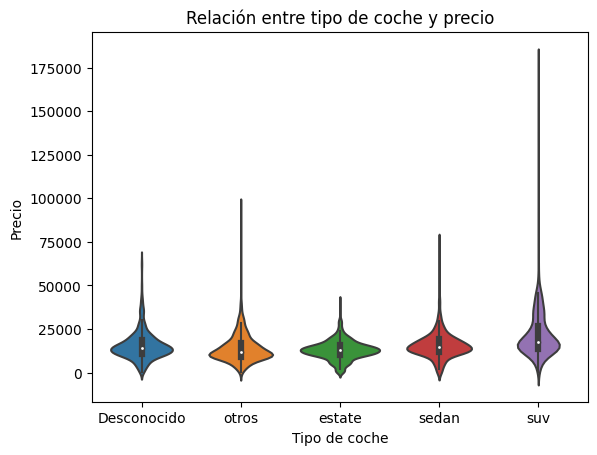

In [7482]:
sns.violinplot(x=df_bmw3['tipo_coche'], y=df_bmw3['precio'])
plt.title('Relación entre tipo de coche y precio')
plt.xlabel('Tipo de coche')
plt.ylabel('Precio')
plt.show()

In [7483]:
# En el caso de la columna "marca", me encuentro con que los NaN 
#  representan el 20% del total de los valores de
# la columna (son 970 en total).
df_bmw2['marca'].value_counts(dropna=False)

marca
BMW    3873
NaN     970
Name: count, dtype: int64

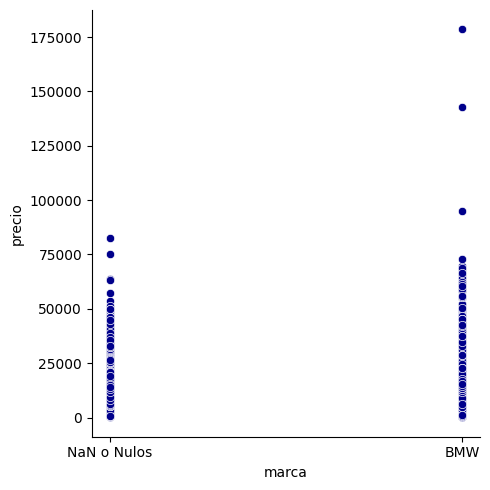

In [7484]:
# La base de datos es de BMW, por lo que quiero analizar si los nulos 
# pueden representar un grupo distinto dentro de la muestra. Por 
# ello, creo una variable que se llame "marca_fillnan" donde
# incluyo el fillna y elijo nombrar a esos nulos "NaN o Nulos".
# Luego, diseño un scatter que incluya a esos valores nulos para ver cómo
# se comportan

marca_fillnan = df_bmw3['marca'].fillna('NaN o Nulos')
sns.relplot(data=df_bmw3,
            x=marca_fillnan, y=df_bmw3['precio'], color='darkblue')

# Como puede observarse, no se encuentran diferencias entre la
# muestra con nulos y sin nulos respecto del precio. Por ende,
# no podemos aseverar la existencia de un grupo distinto 
# (formado por los nulos) de los valores no nulos de la muestra. 
# Dado que todos los valores no nulos de la variable 'marca' son 
# similares, esta variable no proporciona información relevante al modelo
# y, por lo tanto, se puede eliminar.

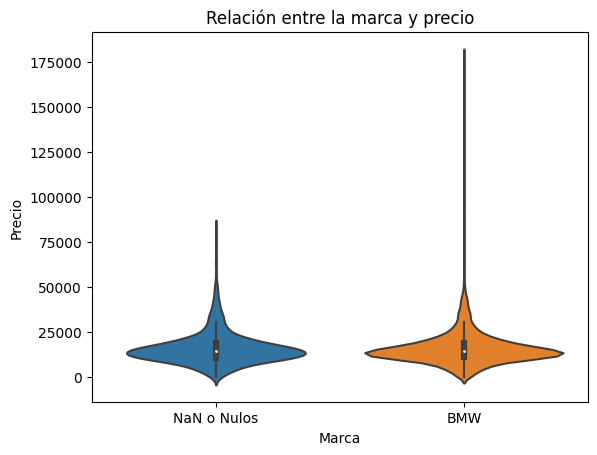

In [7485]:
# Con un violinplot también estudio la relación entre la Marca (incorporando
# los valores NaN) el precio del vehículo. Nuevamente corroboro que 
# estas columnas no me ofrecen demasiada información. Del mismo modo, si decido mantener
# esta columna y rellenar los valores nulos, sólo estaré creando otra 
# categoría que puede tornar aún más problemático el análisis y predicción
# del precio del vehículo
sns.violinplot(x=marca_fillnan, y=df_bmw3['precio'])
plt.title('Relación entre la marca y precio')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.show()

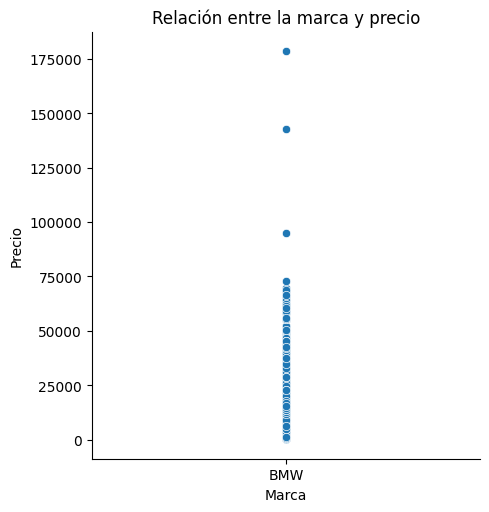

In [7486]:
# Por ello, le sumaré todos los valores NaN a la marca
# BMW.

df_bmw3['marca'] = df_bmw3['marca'].replace('NaN o Nulos', 'BMW')
sns.relplot(x=df_bmw3['marca'], y=df_bmw3['precio'])
plt.title('Relación entre la marca y precio')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.show()

### Elimino columna

In [7487]:
# Luego de un análisis más fino, me propongo eliminar la columna 
# "marca" porque no contiene información sensible que pueda aportar
# a mi análisis de predicción de precios. Partiremos de la base
# que la marca es BMW
del df_bmw3['marca']

In [7488]:
# En el caso de la columna 'alerta_lim_velocidad', me encuentro con 728
#  NaN (el 15% del total). Por lo tanto, al ser un número considerable, me propongo
# estudiar la relación entre el alerta límite de volocidad y el precio del vehículo.
df_bmw2['alerta_lim_velocidad'].value_counts(dropna=False)

alerta_lim_velocidad
True     2240
False    1875
NaN       728
Name: count, dtype: int64

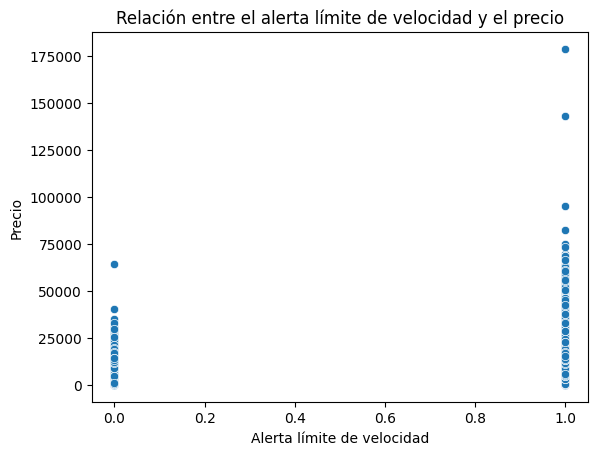

In [7489]:
# Tomando en consideración que nuestro objetivo o "target"
# es el precio, mediante un gráfico de
# dispersión o scatterplot y otro violinplot, verifico si efectivamente hay alguna 
# relación entre el alerta lími te velocidad y el precio del 
# vehículo. A priori puede observarse que  hay una
# relación entre ambas. En otras palabras, si el vehículo tiene
# alerta de límite de velocidad (=1), los precios tenderán a
# ser más altos que si no tiene alerta de límite de velocidad (=0)

sns.scatterplot(x='alerta_lim_velocidad', y='precio', data=df_bmw2)
plt.title('Relación entre el alerta límite de velocidad y el precio')
plt.xlabel('Alerta límite de velocidad')
plt.ylabel('Precio')
plt.show()

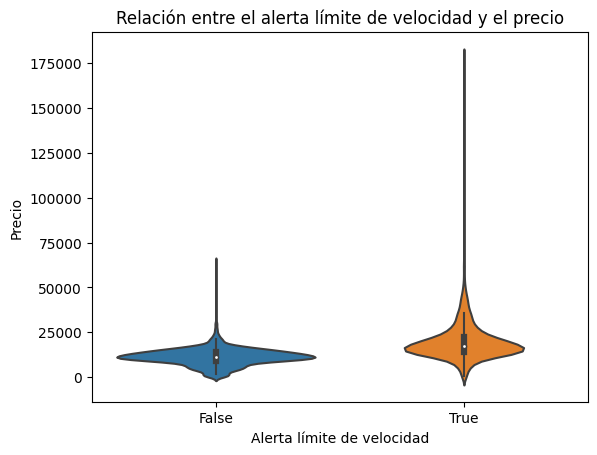

In [7490]:
sns.violinplot(x='alerta_lim_velocidad', y='precio', data=df_bmw2)
plt.title('Relación entre el alerta límite de velocidad y el precio')
plt.xlabel('Alerta límite de velocidad')
plt.ylabel('Precio')
plt.show()

In [7491]:
nulos_alerta = len(df_bmw3['alerta_lim_velocidad'].isnull())
nulos_alerta

4843

In [7492]:
alerta_proporcion = df_bmw3['alerta_lim_velocidad'].value_counts(normalize=True).round(2)
alerta_proporcion

alerta_lim_velocidad
True     0.54
False    0.46
Name: proportion, dtype: float64

### Asignación por proporción

In [7493]:
# Como la proporción de trues y false es muy parecida, me ocupo de asignar los NaN equitativamente entre True y False

random.seed(4)
alerta = pd.Series(random.choices(alerta_proporcion.index, weights=alerta_proporcion.values, k=nulos_alerta))

In [7494]:
df_bmw3['alerta_lim_velocidad'].fillna(alerta, inplace=True)

In [7495]:
df_bmw3['alerta_lim_velocidad'].value_counts(dropna=False)

alerta_lim_velocidad
True     2650
False    2193
Name: count, dtype: int64

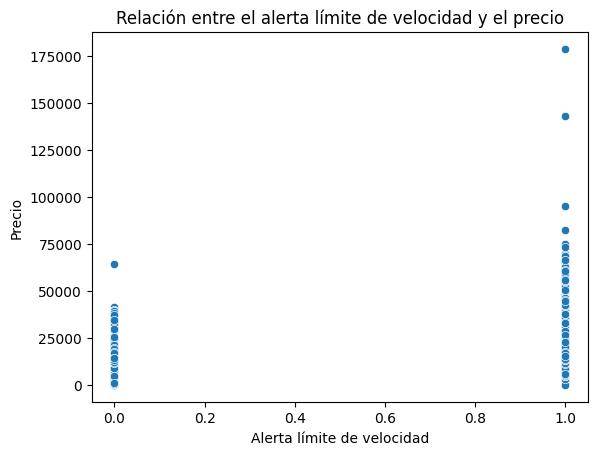

In [7496]:
# Gráfico de dispersión
sns.scatterplot(x='alerta_lim_velocidad', y='precio', data=df_bmw3)
plt.title('Relación entre el alerta límite de velocidad y el precio')
plt.xlabel('Alerta límite de velocidad')
plt.ylabel('Precio')
plt.show()

In [7497]:
# Verifico que ya no haya NaN
df_bmw3['alerta_lim_velocidad'].value_counts(dropna=False)

alerta_lim_velocidad
True     2650
False    2193
Name: count, dtype: int64

In [7498]:
# elimino la columna "alerta_lim_velocidad" porque no parece ser representativa
# en nuestro posterior análisis y predicción del precio
# del df_bmw3['alerta_lim_velocidad']

# Corroboro que ya no haya NaN. Efectivamente, los NaN
# son ahora valores True o 1.
df_bmw3['alerta_lim_velocidad'].value_counts(dropna=False)

alerta_lim_velocidad
True     2650
False    2193
Name: count, dtype: int64

In [7499]:
# Estudio la columna de "bluetooth" para ver cómo están repartidas
# las observaciones. Efectivamente los NaN son 728 en total, lo que
# representa el 15% del total de las observaciones
df_bmw3['bluetooth'].value_counts(dropna=False)

bluetooth
False    3119
True      996
NaN       728
Name: count, dtype: int64

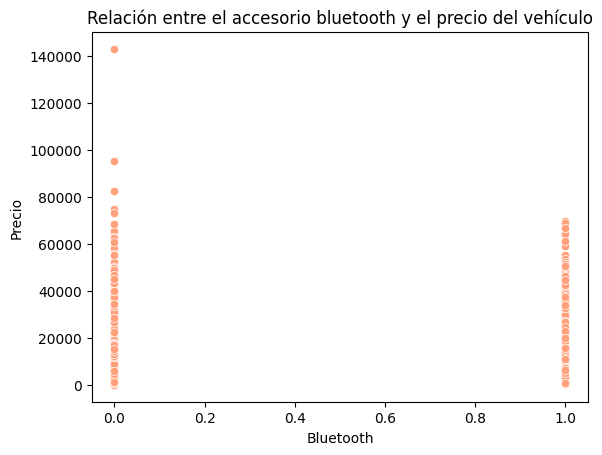

In [7500]:
# Tomando en consideración que nuestro objetivo o "target"
# es el precio, mediante un gráfico de
# dispersión o scatterplot, verifico si efectivamente hay alguna 
# relación entre el dispositivo bluetooth y el precio del 
# vehículo. A priori puede observarse que no hay una
# relación clara entre ambas. En otras palabras, hay una dispersión 
# de los datos que no nos permite llegar a conclusiones precisas acerca de 
# si tener bluetooth en el automóvil puede efectivamente incrementar el 
# precio del mismo

sns.scatterplot(x='bluetooth', y='precio', data=df_bmw3, color='lightsalmon')
plt.title('Relación entre el accesorio bluetooth y el precio del vehículo')
plt.xlabel('Bluetooth')
plt.ylabel('Precio')
plt.show()

In [7501]:
# Calculo la proporción de valores True y False en la columna
# la mayoría de los registros tienen valores "False" 
# en la columna "bluetooth", opto por imputar los 
#  valores faltantes con "False" para mantener la 
# proporción relativa de los valores existentes.
proporcion_true = df_bmw3['bluetooth'].value_counts(normalize=True) * 100
print(proporcion_true)


bluetooth
False    75.795869
True     24.204131
Name: proportion, dtype: float64


In [7502]:
# Relleno los valores NaN con la observación False o (0)
# que aparece el 75% de las veces
df_bmw3['bluetooth'].fillna(False, inplace=True)

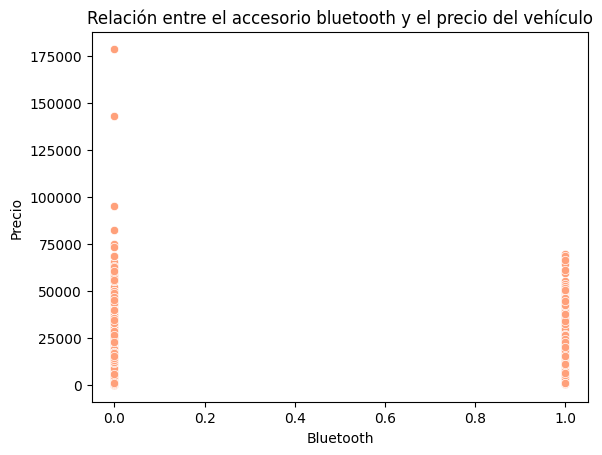

In [7503]:
sns.scatterplot(x='bluetooth', y='precio', data=df_bmw3, color='lightsalmon')
plt.title('Relación entre el accesorio bluetooth y el precio del vehículo')
plt.xlabel('Bluetooth')
plt.ylabel('Precio')
plt.show()

In [7504]:
# Verifico que efectivamente ya no tengo valores NaN
df_bmw3['bluetooth'].value_counts(dropna=False)

bluetooth
False    3847
True      996
Name: count, dtype: int64

In [7505]:
# Elimino la columna "bluetooth" porque no parece ser representativa
# en nuestro posterior análisis y predicción del precio
del df_bmw2['bluetooth']

In [7506]:
# En el caso de la columna "aire_acondicionado", nos encontramos con 486
# NaN, aproximadamente el 10% de los valores totales. Por ello me propongo
# analizar cómo se comporta la variable y si existe alguna relación
#  entre el vehículo que posee "aire_acondicionado" y el precio del mismo
df_bmw3['aire_acondicionado'].value_counts(dropna=False)

aire_acondicionado
True     3465
False     892
NaN       486
Name: count, dtype: int64

In [7507]:
# En este caso vemos que los valores True o (=1) corresponden
# al 79,5% de los casos, lo que evidencia que en su mayoría
# los automóviles del dataset tienen aire acondicionado
proporcion_aire = df_bmw3['aire_acondicionado'].value_counts(normalize=True) * 100
print(proporcion_aire)

aire_acondicionado
True     79.527198
False    20.472802
Name: proportion, dtype: float64


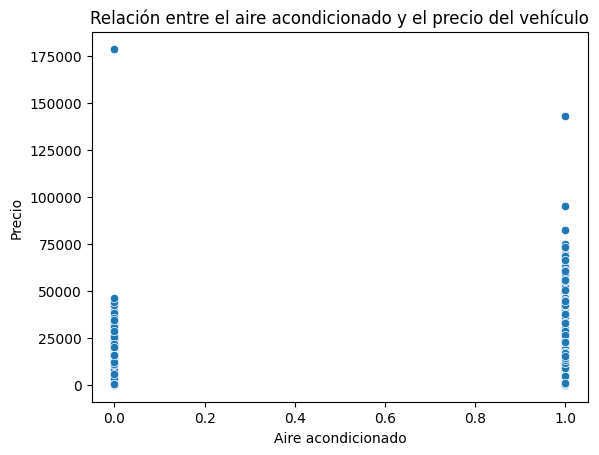

In [7508]:
nulos_aire = df_bmw3['aire_acondicionado'].fillna(1, inplace=True)
sns.scatterplot(data=df_bmw3, x=df_bmw3['aire_acondicionado'], y=df_bmw3['precio'])
plt.title('Relación entre el aire acondicionado y el precio del vehículo')
plt.xlabel('Aire acondicionado')
plt.ylabel('Precio')
plt.show()

# Considerando que los valores nulos no forman un grupo distinto en 
# comparación con el resto de la muestra, hemos procedido a modificar 
# los valores NaN asignándoles un valor entero de 1. (0: no tiene
# aire, 1: tiene aire). Utilizamos la lógica ya que, según el análisis
# anterior, el 79% de los autos posee aire acondiconado. 

In [7509]:
# Corroboro que ya no haya NaN en "aire_acondicionado"
df_bmw3['aire_acondicionado'].value_counts(dropna=False)

aire_acondicionado
True     3951
False     892
Name: count, dtype: int64

In [7510]:
# En el caso de la columna "color", nos encontramos con 445
# NaN, aproximadamente el 9% de los valores totales. Aunque es un número
# considerado bajo, ello me propongo analizar si existe alguna relación entre
# el color del vehículo y el precio del mismo
count_null = df_bmw3['color'].value_counts(dropna=False)
count_prop = df_bmw3['color'].value_counts(dropna=False) / len(df_bmw3['color'])
print("Cuenta de valores nulos:", count_null)
print("\nCuenta de valores totales y proporción:", count_prop)

Cuenta de valores nulos: color
black     1499
grey      1070
blue       647
white      484
NaN        445
brown      302
silver     292
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

Cuenta de valores totales y proporción: color
black     0.309519
grey      0.220937
blue      0.133595
white     0.099938
NaN       0.091885
brown     0.062358
silver    0.060293
red       0.009705
beige     0.007640
green     0.002891
orange    0.001239
Name: count, dtype: float64


<Axes: >

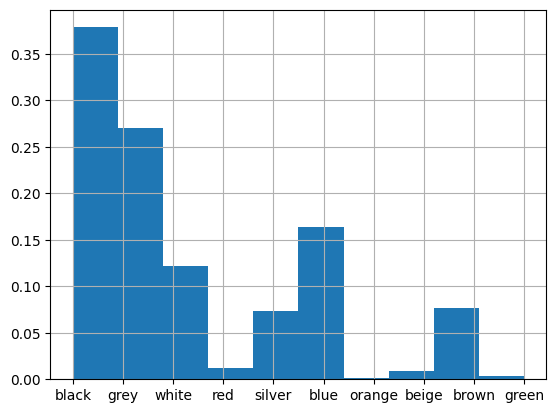

In [7511]:
# Con este histograma de normalización obtengo la 
# densidad de probabilidad en lugar de la frecuencia absoluta
# Nos permite visualizar la distribución de la categoría colores
# presentes en la columna "color". A priori, podemos ver
# que "black", "grey" superan el 25% de las observaciones
# mientras que blue se encuentra sobre el 15%
df_bmw3['color'].hist(density=True)

### Nueva agrupación

In [7512]:
# Claramente hay algunos colores que concentran la mayoría 
# de las observaciones, por eso me dispongo agruparlos

umbral = 0.1
count_prop = df_bmw3['color'].value_counts(dropna=False) / len(df_bmw3['color'])
# Obtener los colores a agrupar en "otros" según el umbral
colores_otros = count_prop[count_prop < umbral].index.tolist()
# Agrupar los colores en "otros" según el umbral
df_bmw3['color'] = df_bmw3['color'].replace(colores_otros, 'others')

# Imprimir los resultados
print(df_bmw3['color'])

0        black
1         grey
2       others
3       others
4       others
         ...  
4838     black
4839      grey
4840      grey
4841    others
4842      grey
Name: color, Length: 4843, dtype: object


In [7513]:
# En el análisis por categorías de la variable, 
# notamos que tres colores (black, grey y blue) representan más del 65% 
# de las observaciones. 

colores_nulos = df_bmw3['color'].fillna('Sin info', inplace=True)
df_bmw3['color'] =='Sin info'


0       False
1       False
2       False
3       False
4       False
        ...  
4838    False
4839    False
4840    False
4841    False
4842    False
Name: color, Length: 4843, dtype: bool

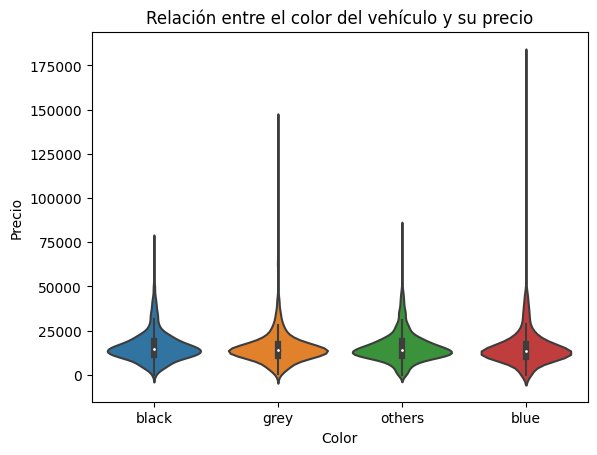

In [7514]:
# Creo un violinplot para ver la distribución de los precios
# para cada categoría de color del vehículo. Al examinar el violinplot, no se observa que los 
# valores nulos formen un grupo distinto dentro de la muestra. 
# Además, parece que para algunos casos (grey and blue) la variable
# 'color' tiene una influencia en el precio del coche.  A priori
# pareciera que esos colores suelen tener precios más elevados.
# Las categorías con menor rango también presentan menor frecuencia, 
# lo que indica una menor variabilidad en los datos. En general, salvo para los
# dos casos mencionados, no se aprecia una relación clara entre el color del coche y su precio. 
# Por ello, corregimos los NaN por 'Sin info'
sns.violinplot(x='color', y='precio', data=df_bmw3)
plt.title('Relación entre el color del vehículo y su precio')
plt.xlabel('Color')
plt.ylabel('Precio')
plt.show()

In [7515]:
df_bmw3['potencia'].value_counts(dropna=False, ascending=False)
# En el caso de la columna 'potencia', me encuentro con un solo valor NaN.
# Por lo tanto, ese valor NaNes muy poco representativo (según el análisis de más arriba,
# tan solo el 0,2% de los valores representan NaN) y me dispongo a eliminarlo
# de la muestra. Con el ascending=False, le pido que me devuelva
# los valores de manera descendente (mayor a menor)

potencia
135.0    882
120.0    785
85.0     631
100.0    570
105.0    451
        ... 
121.0      1
239.0      1
236.0      1
NaN        1
261.0      1
Name: count, Length: 62, dtype: int64

In [7516]:
#Me deshago de los valores nulos
df_bmw3.dropna(subset='potencia', inplace=True)

In [7517]:
# Corroboro que no haya nulos
df_bmw3['potencia'].isnull().sum()

0

In [7518]:
# Dentro de la columna 'km' me encuentro con una situación
# similar, ya que los NaN son solamente dos, lo que representa
# (según las proporciones calculadas más arriba) el 0.0004 
# de la totalidad de los valores de la columna
df_bmw3['km'].isnull().value_counts()

km
False    4840
True        2
Name: count, dtype: int64

In [7519]:
# Corroboro que esta variable tiene valores negativos, lo cual no tiene
# sentido puesto que un vehículo no puede tener km negativo.
# Por ende, me dispongo a eliminar estos valores
(df_bmw3['km'] < 0).any()
df_bmw3 = df_bmw3.drop(df_bmw3[df_bmw3['km'] < 0].index)
df_bmw3

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,diferencia
0,118,140411.0,100.0,diesel,black,Desconocido,True,True,False,True,False,True,True,11300.0,2161.0
1,M4,13929.0,317.0,petrol,grey,otros,True,True,False,False,True,True,True,69700.0,1676.0
2,320,183297.0,120.0,diesel,others,Desconocido,False,False,False,True,False,True,False,10200.0,2132.0
3,420,128035.0,135.0,diesel,others,otros,True,True,False,True,True,True,True,25100.0,1676.0
4,425,97097.0,160.0,diesel,others,Desconocido,True,True,False,False,True,True,True,33400.0,1735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,diesel,black,Desconocido,False,True,False,False,False,True,False,14600.0,1857.0
4839,218 Active Tourer,49832.0,100.0,diesel,grey,Desconocido,False,True,False,False,False,True,True,17500.0,1157.0
4840,218 Gran Tourer,19633.0,110.0,diesel,grey,otros,False,True,False,False,False,True,True,17000.0,1066.0
4841,218 Active Tourer,27920.0,110.0,diesel,others,otros,True,True,False,False,False,True,True,22700.0,883.0


In [7520]:
# Corroboro que haya eliminado los valores negativos
(df_bmw3['km'] < 0).any()

False

In [7521]:
# Elimino los valores nulos
df_bmw3.dropna(subset='km', inplace=True)

In [7522]:
# Chequeo que no haya valores nulos
df_bmw3['km'].isnull().sum()

0

In [7523]:
# Dentro de la columna 'elevalunas_electrico' me encuentro con una situación
# similar, ya que los NaN son solamente dos, lo que representa
# (según las proporciones calculadas más arriba) el 0,04% 
# de la totalidad de los valores de la columna
df_bmw3['elevalunas_electrico'].isnull().value_counts()

elevalunas_electrico
False    4837
True        2
Name: count, dtype: int64

In [7524]:
# Elimino los valores nulos
df_bmw3.dropna(subset='elevalunas_electrico', inplace=True)

In [7525]:
# Chequeo que no haya valores nulos
df_bmw3['elevalunas_electrico'].isnull().sum()

0

In [7526]:
# Dentro de la columna 'camara_trasera' me encuentro con una situación
# similar, ya que los NaN son solamente dos, lo que representa
# (según las proporciones calculadas más arriba) el 0,04% 
# de la totalidad de los valores de la columna
df_bmw3['camara_trasera'].isnull().value_counts()

camara_trasera
False    4835
True        2
Name: count, dtype: int64

In [7527]:
# Elimino los valores nulos
df_bmw3.dropna(subset='camara_trasera', inplace=True)

In [7528]:
# Chequeo que no haya valores nulos
df_bmw3['camara_trasera'].isnull().sum()

0

In [7529]:
# Dentro de la columna 'modelo' me encuentro con solamente tres
# NaN, lo que representa (según las proporciones 
# calculadas más arriba) el 0,06% de la totalidad de
# los valores de la columna
df_bmw3['modelo'].isnull().value_counts()

modelo
False    4832
True        3
Name: count, dtype: int64

In [7530]:
# Elimino los valores nulos
df_bmw3.dropna(subset='modelo', inplace=True)

In [7531]:
# Chequeo que no haya nulos
df_bmw3['modelo'].isnull().sum()

0

In [7532]:
df_bmw3['modelo']

0                     118
1                      M4
2                     320
3                     420
4                     425
              ...        
4838      218 Gran Tourer
4839    218 Active Tourer
4840      218 Gran Tourer
4841    218 Active Tourer
4842                  525
Name: modelo, Length: 4832, dtype: object

### Transformación y agrupación

In [7533]:
# Aquí hago una transformación y agrupación. Creo una columna
# nueva que albergará los valores de la columna "modelo" pero
# agrupados según la categoría del automóvil para combinar serie y tipo
# Inicializo la columna 'categoria' con un valor predeterminado, para
# asegurarme de que todas las filas del DatFrame tengan un valor
# en la columna "categoría" antes de asignar categorías específicas según modelos
df_bmw3['categoria'] = 'Otro'  

# Asigno la categoría correspondiente según investigación de mercado
# que realicé en la página oficial de BMW
df_bmw3.loc[df_bmw3['modelo'].str.startswith('1'), 'categoria'] = 'Serie 1'
df_bmw3.loc[df_bmw3['modelo'].str.startswith('2'), 'categoria'] = 'Serie 2'
df_bmw3.loc[df_bmw3['modelo'].str.startswith('3'), 'categoria'] = 'Serie 3'
df_bmw3.loc[df_bmw3['modelo'].str.startswith('4'), 'categoria'] = 'Serie 4'
df_bmw3.loc[df_bmw3['modelo'].str.startswith('5'), 'categoria'] = 'Serie 5'
df_bmw3.loc[df_bmw3['modelo'].str.startswith('6'), 'categoria'] = 'Serie 6'
df_bmw3.loc[df_bmw3['modelo'].str.startswith('7'), 'categoria'] = 'Serie 7'
df_bmw3.loc[df_bmw3['modelo'].str.startswith('Z'), 'categoria'] = 'Z line'
df_bmw3.loc[df_bmw3['modelo'].str.startswith('X'), 'categoria'] = 'SUV'
df_bmw3.loc[df_bmw3['modelo'].str.startswith('M'), 'categoria'] = 'Deportivo'
df_bmw3.loc[df_bmw3['modelo'].isin(['i3', 'i8']), 'categoria'] = 'BMWi'
df_bmw3.loc[df_bmw3['modelo'].isin(['218 Active Tourer', '218 Gran Tourer']), 'categoria'] = 'Serie 2'
df_bmw3.loc[df_bmw3['modelo'].isin(['ActiveHybrid 5']), 'categoria'] = 'Serie 5'
df_bmw3.loc[df_bmw3['modelo'].str.contains('Active Tourer'), 'categoria'] = 'Serie 2'
df_bmw3['categoria'].value_counts()

categoria
Serie 3      1798
Serie 5      1136
SUV          1060
Serie 1       563
Serie 4       103
Serie 7        54
Serie 2        50
Serie 6        29
Deportivo      26
BMWi            7
Z line          6
Name: count, dtype: int64

In [7534]:
# Verifico que estén todas las categorías asignadas
df_bmw3[df_bmw3['categoria'] == "Otro"]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,diferencia,categoria


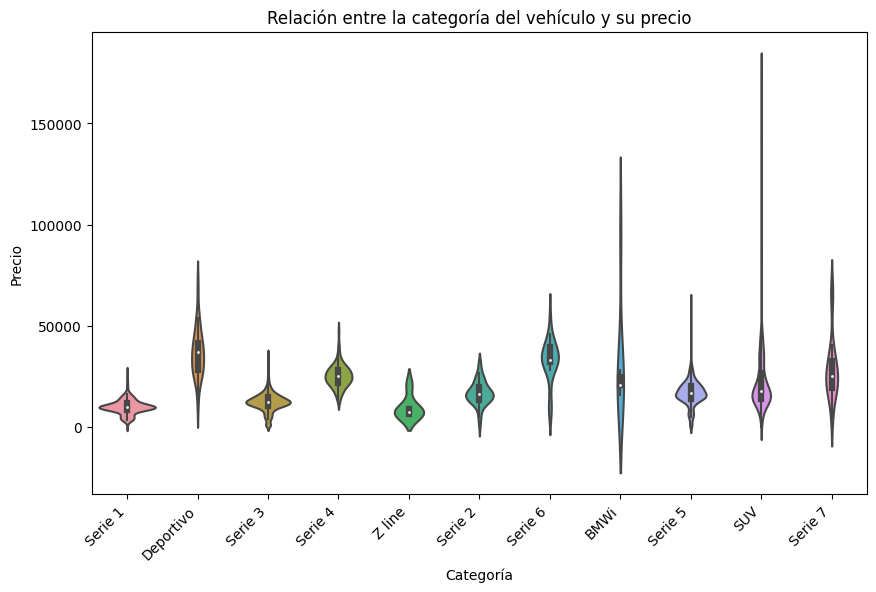

In [7535]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45, ha='right', fontsize=10)
sns.violinplot(x='categoria', y='precio', data=df_bmw3)
plt.title('Relación entre la categoría del vehículo y su precio')
plt.xlabel('Categoría')
plt.ylabel('Precio')
plt.show()

### Elimino columna

In [7536]:
# Elimino la columna modelo porque ya no la necesito, ahora tengo categoría
del df_bmw3['modelo']

In [7537]:
print(df_bmw3['volante_regulable'].value_counts())

volante_regulable
True     2656
False    2172
Name: count, dtype: int64


In [7538]:
# Dentro de la columna 'volante_regulable' me 
# encuentro con solamente cuatro NaN, lo que representa 
# (según las proporciones calculadas más arriba) el 0,08% 
# de la totalidad de los valores de la columna
df_bmw3['volante_regulable'].isnull().value_counts()

volante_regulable
False    4828
True        4
Name: count, dtype: int64

In [7539]:
# Elimino los valores nulos
df_bmw3 = df_bmw3.dropna(subset=['volante_regulable'])

In [7540]:
# Chequeo que no haya valores nulos dentro de la columna
df_bmw3['volante_regulable'].isnull().sum()

0

In [7541]:
print(len(df_bmw3))

4828


In [7542]:
print(df_bmw3['volante_regulable'].value_counts())

volante_regulable
True     2656
False    2172
Name: count, dtype: int64


In [7543]:
# Dentro de la columna 'tipo_gasolina' me 
# encuentro con solamente cinco NaN, lo que representa 
# (según las proporciones calculadas más arriba) el 0,1% 
# de la totalidad de los valores de la columna
df_bmw3['tipo_gasolina'].isnull().value_counts()

tipo_gasolina
False    4823
True        5
Name: count, dtype: int64

In [7544]:
# Elimino los valores nulos
df_bmw3 = df_bmw3.loc[df_bmw3['tipo_gasolina'].notnull()]

In [7545]:
# Chequeo que no haya nulos
df_bmw3['tipo_gasolina'].isnull().sum()

0

In [7546]:
# Dentro de la columna 'precio' me 
# encuentro con solamente seis NaN, lo que representa 
# (según las proporciones calculadas más arriba) el 0,01% 
# de la totalidad de los valores de la columna
df_bmw3['precio'].isnull().value_counts()

precio
False    4817
True        6
Name: count, dtype: int64

In [7547]:
# Elimino los valores nulos
df_bmw3.dropna(subset='precio',inplace=True)

In [7548]:
# Chequeo que no haya nulos
df_bmw3['precio'].isnull().sum()

0

In [7549]:
df_bmw3.isnull().any()

km                      False
potencia                False
tipo_gasolina           False
color                   False
tipo_coche              False
volante_regulable       False
aire_acondicionado      False
camara_trasera          False
elevalunas_electrico    False
bluetooth               False
gps                     False
alerta_lim_velocidad    False
precio                  False
diferencia              False
categoria               False
dtype: bool

In [7550]:
# Hago otro checkpoint con el DataFrame ya limpio
df_bmw_cleaned = df_bmw3.copy()

### Análisis de las variables una a una y transformaciones

In [7551]:
# Luego de abocarme al análisis de los valores nulos por 
# columna, me dispongo a hacer un tratamiento de las
# diferentes variables del dataframe, para no entorpecer
# el análisis y predicción posterior. En este caso, trataré 
# las columnas que contengan fechas (ya eliminadas anteriormente)
# y aquellos booleanos que son objetos para transformarlos en valores numéricos 
# que sean más asequibles para el análisis posterior

In [7552]:
# Busco el tipo de la columna "volante_regulable"
df_bmw_cleaned['volante_regulable'].dtype 

dtype('O')

In [7553]:
# Los valores True y False representan valores booleanos en la columna 
# 'volante_regulable'. El valor nan representa un valor nulo (NaN) en la
# columna. Finalmente, el tipo de datos 'object' indica que los valores en 
# la columna se están representando como objetos en lugar de tipos de datos 
# nativos, como booleanos o enteros.
df_bmw_cleaned['volante_regulable'].unique()

array([True, False], dtype=object)

In [7554]:
# Como puedo ver en el comando "df_bmw2.head()", desde volante regulable 
# [columna 6] hasta alerta_lim_velocidad[columna 13], los datos son booleanos,
# y (como puedo ver con un df_bmw2.info()) están representados como objetos en 
# lugar de datos de tipo nativo
df_bmw_cleaned.iloc[:,6:13]

,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio
0,True,False,True,False,True,True,11300.0
1,True,False,False,True,True,True,69700.0
2,False,False,True,False,True,False,10200.0
3,True,False,True,True,True,True,25100.0
4,True,False,False,True,True,True,33400.0
...,...,...,...,...,...,...,...
4838,True,False,False,False,True,False,14600.0
4839,True,False,False,False,True,True,17500.0
4840,True,False,False,False,True,True,17000.0
4841,True,False,False,False,True,True,22700.0


In [7555]:
# Por lo tanto, me propongo cambiar los tipos de datos de las 
# siguientes variables:
# (1) 'volante_regulable', 'aire_acondicionado', 'camara_trasera',
#      'elevalunas_electrico', 'bluetooth', 'gps' y 'alerta_lim_velocidad' a integer

In [7556]:
df_bmw_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4817 non-null   float64
 1   potencia              4817 non-null   float64
 2   tipo_gasolina         4817 non-null   object 
 3   color                 4817 non-null   object 
 4   tipo_coche            4817 non-null   object 
 5   volante_regulable     4817 non-null   object 
 6   aire_acondicionado    4817 non-null   object 
 7   camara_trasera        4817 non-null   object 
 8   elevalunas_electrico  4817 non-null   object 
 9   bluetooth             4817 non-null   bool   
 10  gps                   4817 non-null   bool   
 11  alerta_lim_velocidad  4817 non-null   bool   
 12  precio                4817 non-null   float64
 13  diferencia            4817 non-null   float64
 14  categoria             4817 non-null   object 
dtypes: bool(3), float64(4), ob

In [7557]:
df_bmw_cleaned.info()
df_bmw_cleaned.iloc[:,5:12]

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4817 non-null   float64
 1   potencia              4817 non-null   float64
 2   tipo_gasolina         4817 non-null   object 
 3   color                 4817 non-null   object 
 4   tipo_coche            4817 non-null   object 
 5   volante_regulable     4817 non-null   object 
 6   aire_acondicionado    4817 non-null   object 
 7   camara_trasera        4817 non-null   object 
 8   elevalunas_electrico  4817 non-null   object 
 9   bluetooth             4817 non-null   bool   
 10  gps                   4817 non-null   bool   
 11  alerta_lim_velocidad  4817 non-null   bool   
 12  precio                4817 non-null   float64
 13  diferencia            4817 non-null   float64
 14  categoria             4817 non-null   object 
dtypes: bool(3), float64(4), ob

,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad
0,True,True,False,True,False,True,True
1,True,True,False,False,True,True,True
2,False,False,False,True,False,True,False
3,True,True,False,True,True,True,True
4,True,True,False,False,True,True,True
...,...,...,...,...,...,...,...
4838,False,True,False,False,False,True,False
4839,False,True,False,False,False,True,True
4840,False,True,False,False,False,True,True
4841,True,True,False,False,False,True,True


In [7558]:
columnas_entero = df_bmw_cleaned.columns[5:13]
df_bmw_cleaned[columnas_entero] = df_bmw_cleaned[columnas_entero].apply(pd.to_numeric, errors='coerce')
df_bmw_cleaned[columnas_entero] = df_bmw_cleaned[columnas_entero].astype(int)


In [7559]:
# Verifico que no haya valores de precio inferiores a 0
df_bmw_cleaned[df_bmw_cleaned['precio']<0]

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,diferencia,categoria


### Análisis univariable

count    4.817000e+03
mean     1.409912e+05
std      6.023679e+04
min      4.760000e+02
25%      1.028560e+05
50%      1.410630e+05
75%      1.752520e+05
max      1.000376e+06
Name: km, dtype: float64
--------------------------------------
count    4817.000000
mean      128.962010
std        38.977915
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       423.000000
Name: potencia, dtype: float64


--------------------------------------
tipo_gasolina
diesel           4610
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64
tipo_gasolina
diesel           95.702720
petrol            3.965124
hybrid_petrol     0.166078
Diesel            0.103799
electro           0.062279
Name: count, dtype: float64
--------------------------------------
color
others    1619
black     1488
grey      1067
blue       643
Name: count, dtype: int64
color
others    33.610131
black     30.890596
grey      22.150716
blue      13.348557
Name: count, dtype: float64
--------------------------------------
tipo_coche
Desconocido    1450
estate         1097
sedan           820
suv             754
otros           696
Name: count, dtype: int64
tipo_coche
Desconocido    30.101723
estate         22.773510
sedan          17.023043
suv            15.652896
otros          14.448827
Name: count, dtype: float64
--------------------------------------
count    4

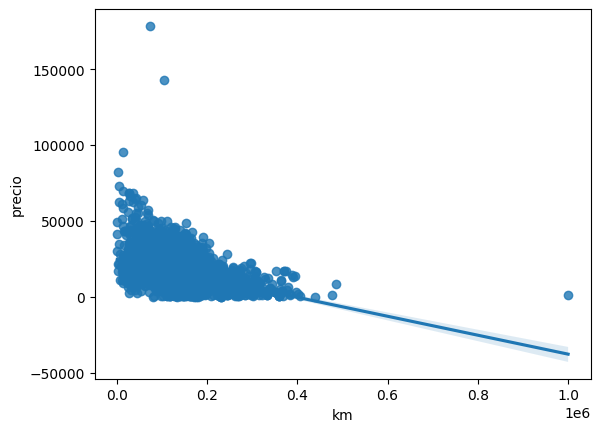

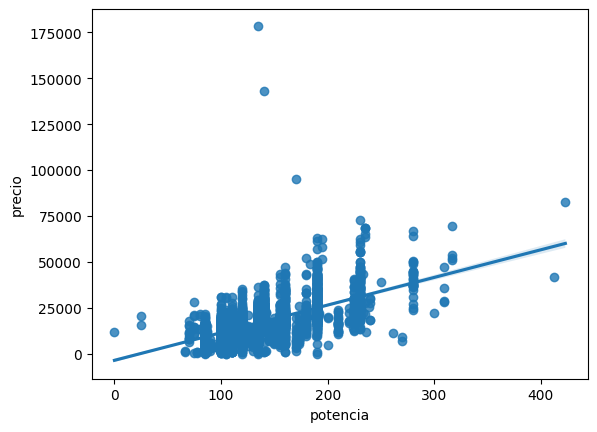

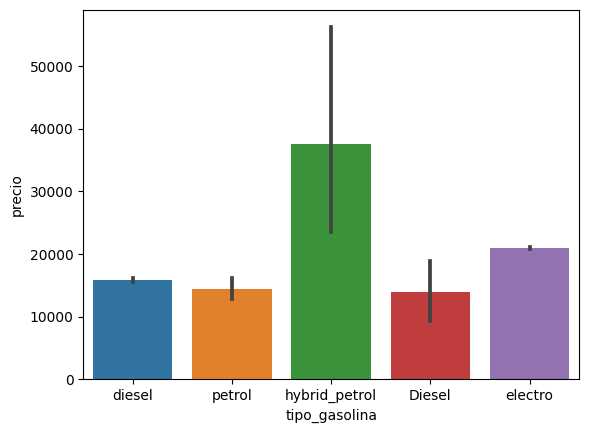

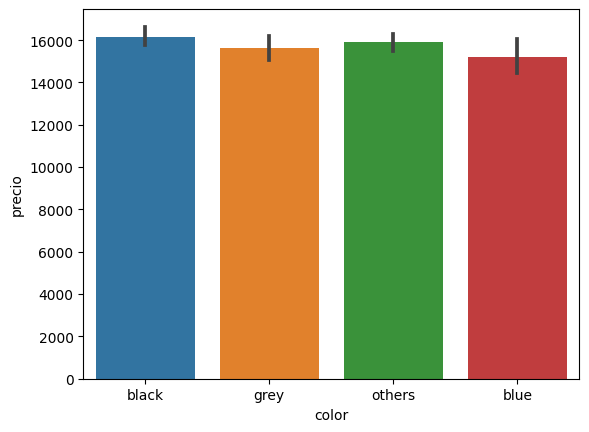

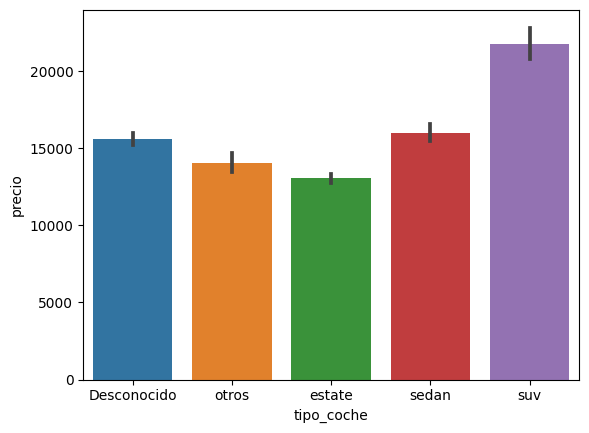

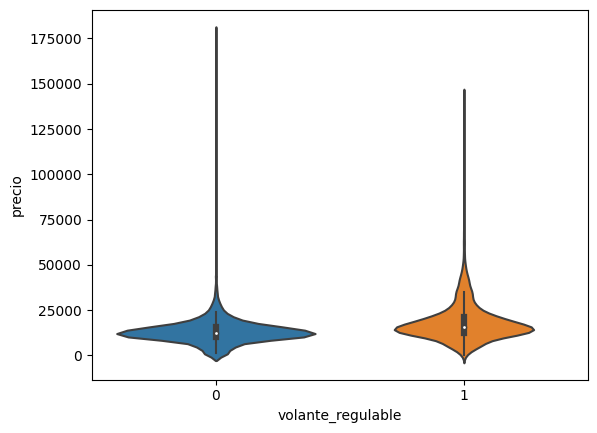

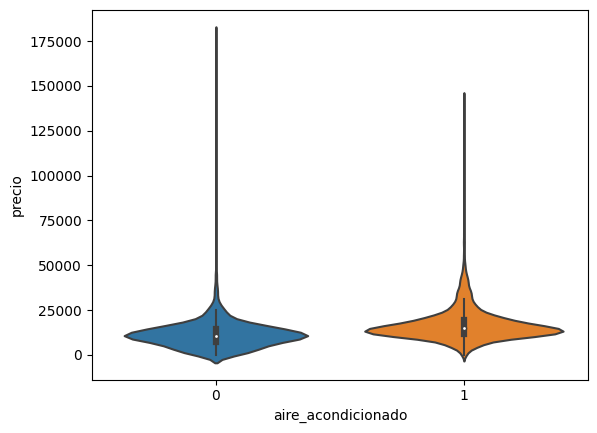

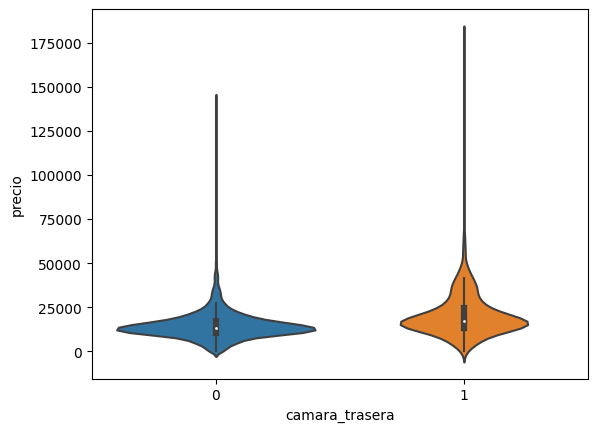

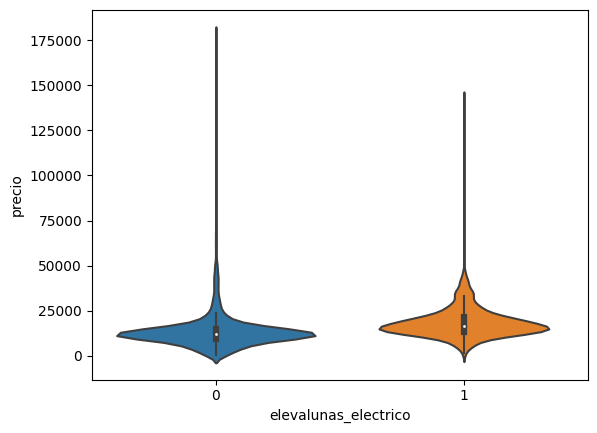

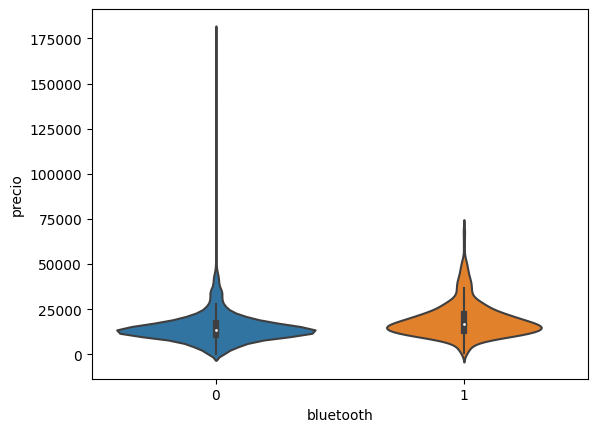

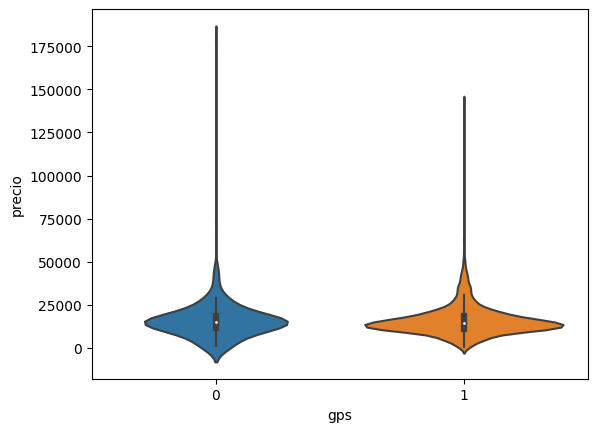

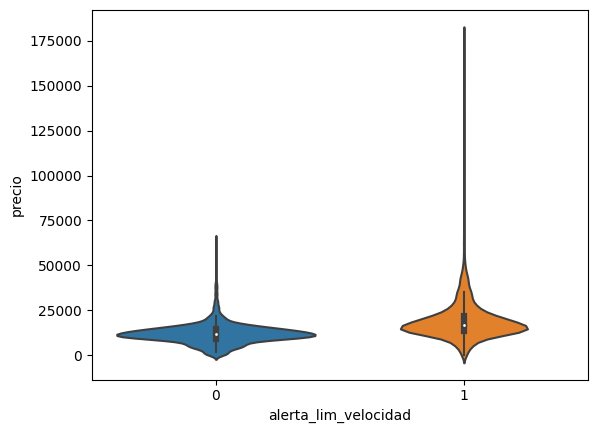

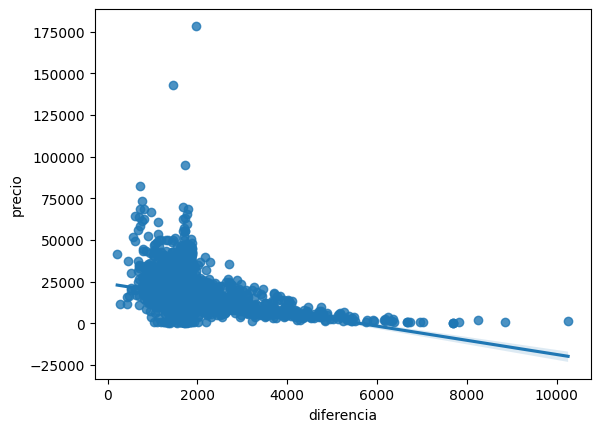

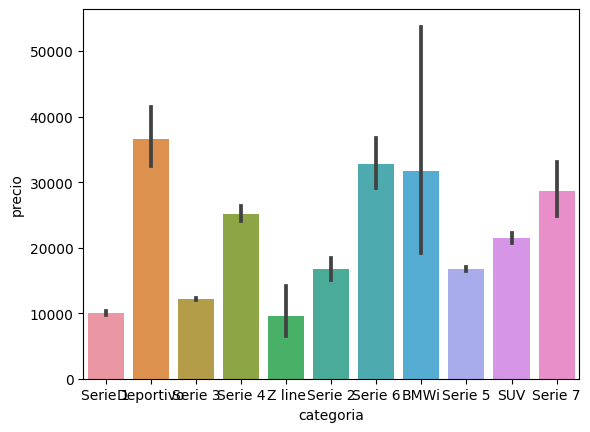

In [7560]:
for i in df_bmw_cleaned:
    if df_bmw_cleaned[i].dtype.kind == 'O':
        # Plotear columnas de tipo 'object'
        print(df_bmw_cleaned[i].value_counts())
        print(df_bmw_cleaned[i].value_counts() / len(df_bmw_cleaned) * 100)
        plt.figure()
        sns.barplot(x=i, y='precio', data=df_bmw_cleaned)
        print("--------------------------------------")
    elif df_bmw_cleaned[i].dtype.kind == 'i':
       if i != 'precio':
          print(df_bmw_cleaned[i].describe())
          plt.figure()
          sns.violinplot(x=i, y='precio', data=df_bmw_cleaned)
          print("--------------------------------------")
    elif df_bmw_cleaned[i].dtype.kind == 'f':
        if i != 'precio':
            plt.figure()
            print(df_bmw_cleaned[i].describe())
            sns.regplot(x=i, y='precio', data=df_bmw_cleaned)
            print("--------------------------------------")


### Outliers

In [7561]:
# Aquí creo una función para  detectar los outliers.
# La función toma dos parámetros, el dataframe y la columna.
# Dentro de la función se calculan los cuartiles y el rango
# intercuartílico de la columna esperada. A su vez, se
# calculan los límites inferior y superior para definir el rango
# dentro del cual los valores no se considerarán outliers.
# A continuación, se seleccionan todos los valores del 
# DataFrame "data" que están por debajo del límite inferior 
# o por encima del límite superior, lo que indica que son 
# outliers. Estos outliers se almacenan en una nueva 
# variable llamada "outliers". Finalmente, se imprime el 
# nombre de la columna y la cantidad de outliers detectados
#  para esa columna. Se utiliza un bucle "for" para iterar 
# sobre todas las columnas numéricas del DataFrame y 
# realizar esta operación de detección de outliers para 
# cada columna. Al final hago un print para que me cuenta
# la cantidad de outliers detectados por columna

def detectar_outliers(data, column):
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
columnas_numericas = df_bmw_cleaned.select_dtypes(include=['int', 'float']).columns
for columna in columnas_numericas:
    outliers = detectar_outliers(df_bmw_cleaned, columna)
    cantidad_outliers = len(outliers)
    print(f"Columna: {columna}")
    print(f"Cantidad de outliers detectados: {cantidad_outliers}")
    print("--------------------------------------")


Columna: km
Cantidad de outliers detectados: 97
--------------------------------------
Columna: potencia
Cantidad de outliers detectados: 587
--------------------------------------
Columna: volante_regulable
Cantidad de outliers detectados: 0
--------------------------------------
Columna: aire_acondicionado
Cantidad de outliers detectados: 887
--------------------------------------
Columna: camara_trasera
Cantidad de outliers detectados: 971
--------------------------------------
Columna: elevalunas_electrico
Cantidad de outliers detectados: 0
--------------------------------------
Columna: bluetooth
Cantidad de outliers detectados: 991
--------------------------------------
Columna: gps
Cantidad de outliers detectados: 325
--------------------------------------
Columna: alerta_lim_velocidad
Cantidad de outliers detectados: 0
--------------------------------------
Columna: precio
Cantidad de outliers detectados: 309
--------------------------------------
Columna: diferencia
Cantidad d

In [7562]:
# Aquí hago una condición para transformar los outliers en logarítmicas,
# ya que es uno de los métodos de reducir el impacto de los outliers,
# mejorar la simetría de los datos y conservar una proporción relativa de los
# valores. En caso de que los haya transformado, lo printeo luego exhibiendo
# la diferencia entre los valores originales y los transformados en logarítmica.
if len(outliers) > 0:
        valores_originales = df_bmw_cleaned.loc[outliers.index, columna]
        valores_transformados = np.log(df_bmw_cleaned.loc[outliers.index, columna])
        
        print("Valores originales:")
        print(valores_originales)
        print("Valores transformados:")
        print(valores_transformados)
    
print("--------------------------------------")

Valores originales:
0       2161.0
2       2132.0
5       2468.0
7       3106.0
13       943.0
         ...  
4833    1187.0
4836    1096.0
4839    1157.0
4840    1066.0
4841     883.0
Name: diferencia, Length: 1089, dtype: float64
Valores transformados:
0       7.678326
2       7.664816
5       7.811163
7       8.041091
13      6.849066
          ...   
4833    7.079184
4836    6.999422
4839    7.053586
4840    6.971669
4841    6.783325
Name: diferencia, Length: 1089, dtype: float64
--------------------------------------


In [7563]:
# Aquí extraigo la columna precio, luego la elimino del dataframe, y por
# último la ubico al principio del DataFrame para poder calcular la correlación
# entre el precio y las restantes columnas
precio = df_bmw_cleaned['precio']
df_bmw_cleaned = df_bmw_cleaned.drop('precio', axis=1)
df_bmw_cleaned.insert(0, 'precio', precio)

### El target (precio)

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

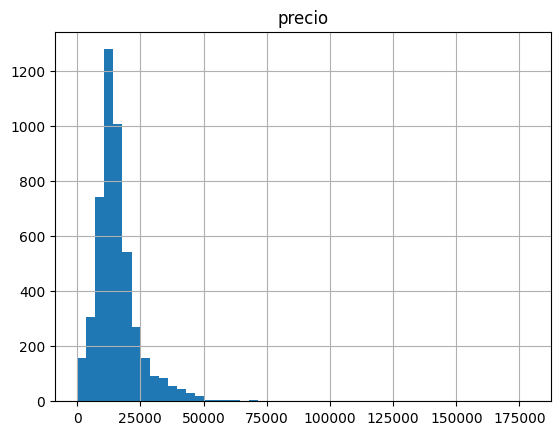

In [7564]:
# Aquí chequeo la distribución del precio, puede ver que
# ya es bastante normal, por ende no le aplico log
df_bmw_cleaned.hist('precio', bins=50)

In [7565]:
print(df_bmw_cleaned.columns)

Index(['precio', 'km', 'potencia', 'tipo_gasolina', 'color', 'tipo_coche',
       'volante_regulable', 'aire_acondicionado', 'camara_trasera',
       'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad',
       'diferencia', 'categoria'],
      dtype='object')


In [7566]:
df_bmw_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   precio                4817 non-null   int32  
 1   km                    4817 non-null   float64
 2   potencia              4817 non-null   float64
 3   tipo_gasolina         4817 non-null   object 
 4   color                 4817 non-null   object 
 5   tipo_coche            4817 non-null   object 
 6   volante_regulable     4817 non-null   int32  
 7   aire_acondicionado    4817 non-null   int32  
 8   camara_trasera        4817 non-null   int32  
 9   elevalunas_electrico  4817 non-null   int32  
 10  bluetooth             4817 non-null   int32  
 11  gps                   4817 non-null   int32  
 12  alerta_lim_velocidad  4817 non-null   int32  
 13  diferencia            4817 non-null   float64
 14  categoria             4817 non-null   object 
dtypes: float64(3), int32(8), o

### Generación de listas a partir del dataset

In [7567]:
target = ["precio"]

def obtener_lista_variables(dataset):
    lista_numericas = []
    lista_categoricas = []

    for i in dataset:
        if (dataset[i].dtype.kind in ("f", "i")) and i not in target:
            lista_numericas.append(i)
        elif dataset[i].dtype.kind == "O" and i not in target:
            lista_categoricas.append(i)
    lista_numericas.insert(0, target[0])

    return lista_numericas, lista_categoricas


In [7568]:
lista_numericas, lista_categoricas= obtener_lista_variables(df_bmw_cleaned)

In [7569]:
lista_categoricas

['tipo_gasolina', 'color', 'tipo_coche', 'categoria']

In [7570]:
lista_numericas

['precio',
 'km',
 'potencia',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad',
 'diferencia']

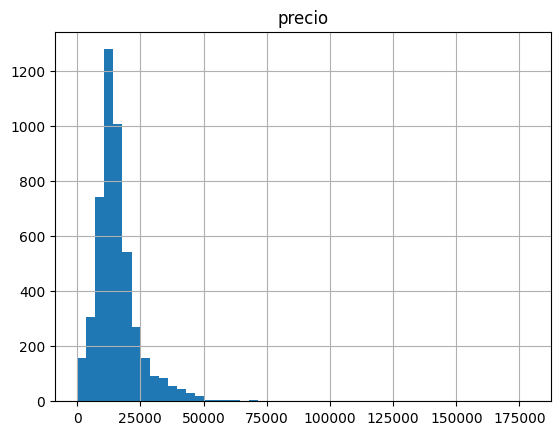

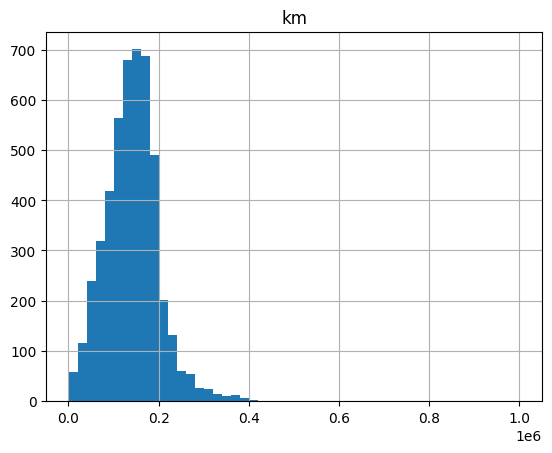

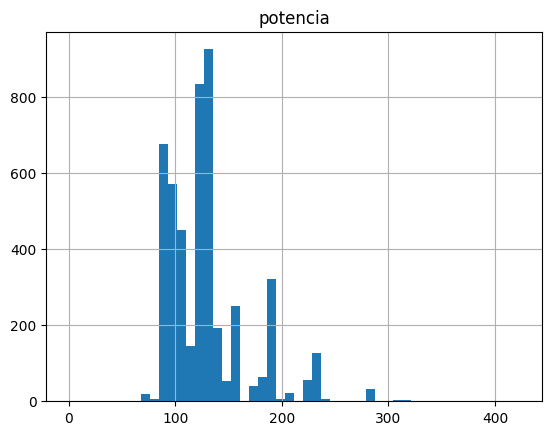

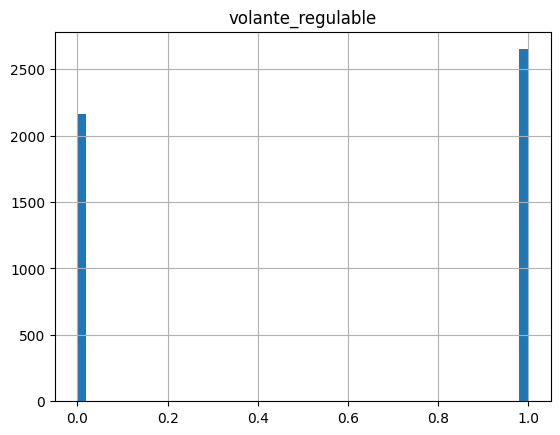

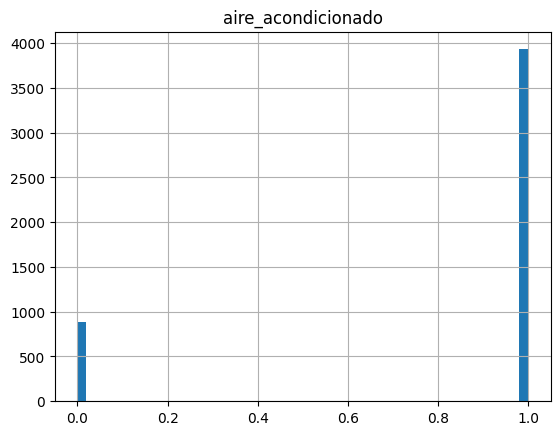

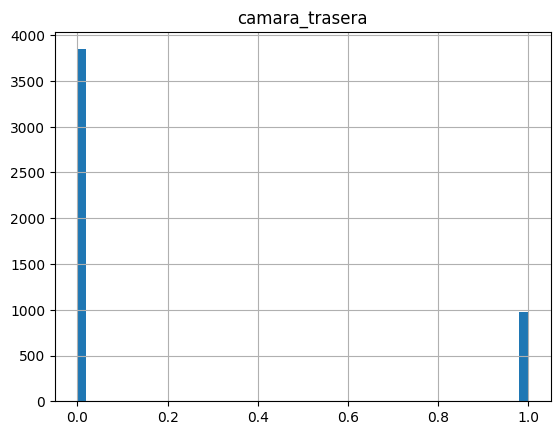

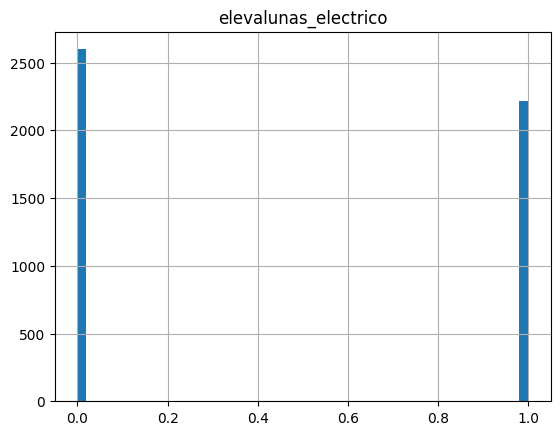

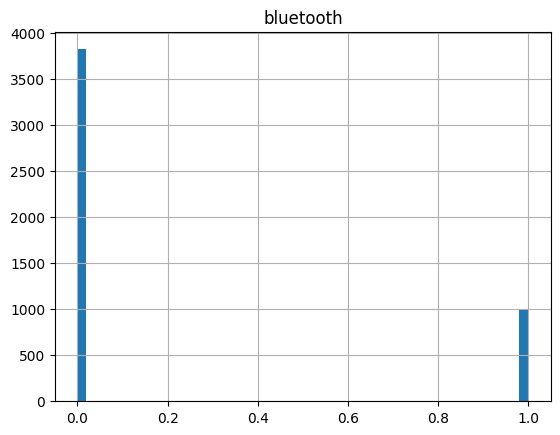

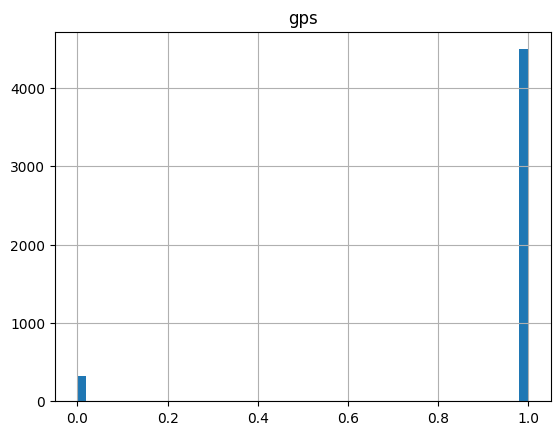

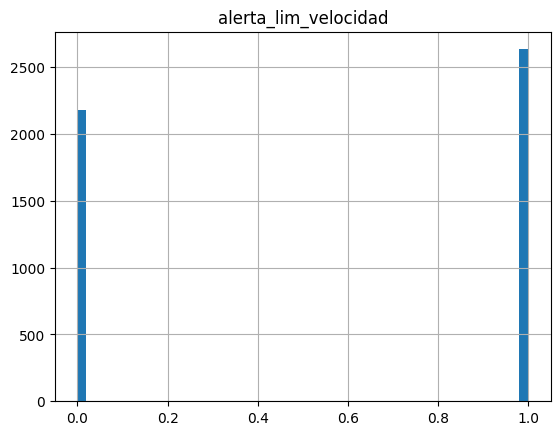

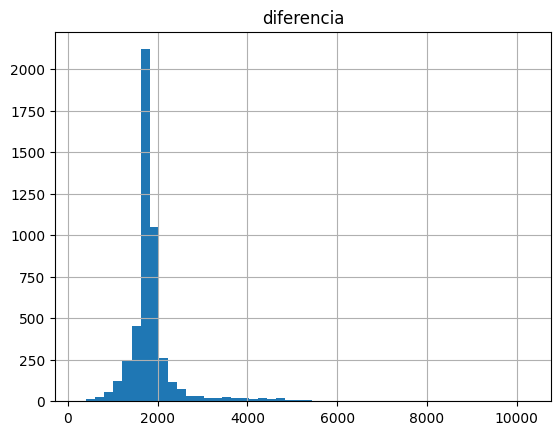

In [7571]:
for i in lista_numericas:
    df_bmw_cleaned.hist(i, bins=50)
    # Aquí corroboro los outliers anteriores que me 
    # devuelve mi función

In [7572]:
print(df_bmw_cleaned.columns)


Index(['precio', 'km', 'potencia', 'tipo_gasolina', 'color', 'tipo_coche',
       'volante_regulable', 'aire_acondicionado', 'camara_trasera',
       'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad',
       'diferencia', 'categoria'],
      dtype='object')


In [7573]:
df_bmw_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   precio                4817 non-null   int32  
 1   km                    4817 non-null   float64
 2   potencia              4817 non-null   float64
 3   tipo_gasolina         4817 non-null   object 
 4   color                 4817 non-null   object 
 5   tipo_coche            4817 non-null   object 
 6   volante_regulable     4817 non-null   int32  
 7   aire_acondicionado    4817 non-null   int32  
 8   camara_trasera        4817 non-null   int32  
 9   elevalunas_electrico  4817 non-null   int32  
 10  bluetooth             4817 non-null   int32  
 11  gps                   4817 non-null   int32  
 12  alerta_lim_velocidad  4817 non-null   int32  
 13  diferencia            4817 non-null   float64
 14  categoria             4817 non-null   object 
dtypes: float64(3), int32(8), o

### Matriz de correlación

In [7574]:
# Calculo la matriz de correlación de la lista de numéricas
df_bmw_cleaned_num = df_bmw_cleaned[lista_numericas]
corr = df_bmw_cleaned_num.corr()
corr.style.background_gradient(cmap='coolwarm')

,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,diferencia
precio,1.000000,-0.408946,0.638645,0.267483,0.224178,0.252711,0.263551,0.184759,-0.009181,0.383408,-0.305873
km,-0.408946,1.000000,-0.048667,0.066614,0.013230,0.002373,0.046137,-0.031706,0.155412,-0.024683,0.334533
potencia,0.638645,-0.048667,1.000000,0.326997,0.181887,0.313066,0.342991,0.203870,0.008147,0.426164,-0.064693
volante_regulable,0.267483,0.066614,0.326997,1.000000,0.286561,0.253417,0.277784,0.124514,0.242673,0.191854,0.047858
aire_acondicionado,0.224178,0.013230,0.181887,0.286561,1.000000,0.142585,0.258539,0.102662,0.341977,0.183139,-0.137220
camara_trasera,0.252711,0.002373,0.313066,0.253417,0.142585,1.000000,0.197976,0.125755,0.060885,0.174481,0.017741
elevalunas_electrico,0.263551,0.046137,0.342991,0.277784,0.258539,0.197976,1.000000,0.232321,0.202097,0.291300,-0.067390
bluetooth,0.184759,-0.031706,0.203870,0.124514,0.102662,0.125755,0.232321,1.000000,0.114373,0.089656,-0.048127
gps,-0.009181,0.155412,0.008147,0.242673,0.341977,0.060885,0.202097,0.114373,1.000000,-0.053567,0.062454
alerta_lim_velocidad,0.383408,-0.024683,0.426164,0.191854,0.183139,0.174481,0.291300,0.089656,-0.053567,1.000000,-0.093916


In [7575]:
target = ["precio"]

def nueva_lista_variables(dataset):
    lista_numericas = []
    lista_categoricas = []

    for i in dataset.columns:
        if (dataset[i].dtype.kind in ("f", "i")) and i not in target:
            lista_numericas.append(i)
        elif dataset[i].dtype.kind == "O" and i not in target:
            lista_categoricas.append(i)

    return lista_numericas, lista_categoricas


In [7576]:
lista_numericas, lista_categoricas = nueva_lista_variables(df_bmw_cleaned)


### ¿Hay variables correlacionadas?

In [7577]:
def check_correlation(df_bmw_cleaned_num, threshold):
    numeric_cols = df_bmw_cleaned.select_dtypes(include=['float', 'int']).columns
    numeric_df = df_bmw_cleaned[numeric_cols]
    
    corr_matrix = numeric_df.corr()
    correlated_vars = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            correlation = corr_matrix.iloc[i, j]
            if abs(correlation) >= threshold:
                var_i = corr_matrix.columns[i]
                var_j = corr_matrix.columns[j]
                correlated_vars.append(var_i)
                correlated_vars.append(var_j)
    
    correlated_vars = list(set(correlated_vars))
    
    if len(correlated_vars) > 0:
        print("Variables correlacionadas:")
        for var in correlated_vars:
            print(var)
    else:
        print("No se encontraron variables correlacionadas.")

In [7578]:
check_correlation(df_bmw_cleaned_num, 0.9)

No se encontraron variables correlacionadas.


In [7579]:
# Genero una función para eliminar columnas correlacionadas, aunque en este caso
# ya sé que no habrá (según el código anterior). Por ello me devuelve el dataframe
# entero
def remove_correlated_columns(df, threshold):
    col_corr = []
    corr_matrix = df.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                col_corr.append(corr_matrix.columns[i])

    df = df.drop(columns=col_corr)
    return df
remove_correlated_columns(df_bmw_cleaned_num, threshold=0.9)

,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,diferencia
0,11300,140411.0,100.0,1,1,0,1,0,1,1,2161.0
1,69700,13929.0,317.0,1,1,0,0,1,1,1,1676.0
2,10200,183297.0,120.0,0,0,0,1,0,1,0,2132.0
3,25100,128035.0,135.0,1,1,0,1,1,1,1,1676.0
4,33400,97097.0,160.0,1,1,0,0,1,1,1,1735.0
...,...,...,...,...,...,...,...,...,...,...,...
4838,14600,39743.0,110.0,0,1,0,0,0,1,0,1857.0
4839,17500,49832.0,100.0,0,1,0,0,0,1,1,1157.0
4840,17000,19633.0,110.0,0,1,0,0,0,1,1,1066.0
4841,22700,27920.0,110.0,1,1,0,0,0,1,1,883.0


### Mínima varianza

In [7580]:
# Busco las variables con mínima varianza, en caso de encontrarlas las elimino
vt = VarianceThreshold(threshold=0.01)
df_bmw_cleaned_num_copy = df_bmw_cleaned_num.copy()
vt.fit(df_bmw_cleaned_num_copy)

# Aquí obtengo las columnas de baja varianza
cols_lowvar = df_bmw_cleaned_num_copy.columns[vt.get_support() == False]

print('Hay',len(cols_lowvar), 'variables de baja varianza\n', cols_lowvar.to_list())

# Tuve que adecuar esta variable para eliminar las columnas de baja varianza 
# utilizando loc en el DataFrame original porque me devolvía una advertencia:
# "A value is trying to be set on a copy of a slice from a DataFrame"
df_bmw_cleaned_num = df_bmw_cleaned_num.loc[:, ~df_bmw_cleaned_num.columns.isin(cols_lowvar)]

# Verificar la forma del DataFrame resultante
print(df_bmw_cleaned_num.shape)

Hay 0 variables de baja varianza
 []
(4817, 11)


### One-hot encoding y min max scaler

In [7581]:
# Realizo un One-Hot Encoding para convertir variables
# categóricas en variables numéricas, de modo que pueda
# ser utilizado en la correlación y predicción posterior
df_bmw_encoded=pd.get_dummies(data=df_bmw_cleaned,
                               columns=lista_categoricas
                               )

In [7582]:
def minmaxTransformacion(variable_transformar):
    minMaxResultado=MinMaxScaler()
    df_bmw_encoded[f"minMax_{variable_transformar}"]=minMaxResultado.fit_transform(df_bmw_encoded[variable_transformar].values.reshape(-1,1))
    return minMaxResultado

In [7583]:
for i in lista_numericas:
    globals()[f"minMax_{i}"] = minmaxTransformacion(i)

### Nueva matriz de correlación, con los datos escalados

In [7584]:
# Calculo la matriz de correlación
corr_ = df_bmw_encoded.corr()
corr_.style.background_gradient(cmap='coolwarm')

,precio,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,diferencia,tipo_gasolina_Diesel,tipo_gasolina_diesel,tipo_gasolina_electro,tipo_gasolina_hybrid_petrol,tipo_gasolina_petrol,color_black,color_blue,color_grey,color_others,tipo_coche_Desconocido,tipo_coche_estate,tipo_coche_otros,tipo_coche_sedan,tipo_coche_suv,categoria_BMWi,categoria_Deportivo,categoria_SUV,categoria_Serie 1,categoria_Serie 2,categoria_Serie 3,categoria_Serie 4,categoria_Serie 5,categoria_Serie 6,categoria_Serie 7,categoria_Z line,minMax_km,minMax_potencia,minMax_volante_regulable,minMax_aire_acondicionado,minMax_camara_trasera,minMax_elevalunas_electrico,minMax_bluetooth,minMax_gps,minMax_alerta_lim_velocidad,minMax_diferencia
precio,1.000000,-0.408946,0.638645,0.267483,0.224178,0.252711,0.263551,0.184759,-0.009181,0.383408,-0.305873,-0.006553,0.010345,0.013970,0.096582,-0.031609,0.024805,-0.025684,-0.012522,0.005238,-0.016983,-0.164133,-0.079271,0.009265,0.277995,0.065931,0.166837,0.326221,-0.231480,0.010536,-0.306151,0.149114,0.056757,0.143972,0.147804,-0.024329,-0.408946,0.638645,0.267483,0.224178,0.252711,0.263551,0.184759,-0.009181,0.383408,-0.305873
km,-0.408946,1.000000,-0.048667,0.066614,0.013230,0.002373,0.046137,-0.031706,0.155412,-0.024683,0.334533,0.005996,0.046264,-0.037486,-0.034932,-0.036987,0.034026,-0.019939,0.023217,-0.039336,0.003101,0.134165,-0.134396,0.061462,-0.092293,-0.046284,-0.032437,-0.114965,-0.111838,-0.127907,0.107485,-0.137919,0.168790,-0.033043,0.001730,-0.021340,1.000000,-0.048667,0.066614,0.013230,0.002373,0.046137,-0.031706,0.155412,-0.024683,0.334533
potencia,0.638645,-0.048667,1.000000,0.326997,0.181887,0.313066,0.342991,0.203870,0.008147,0.426164,-0.064693,0.002016,-0.118718,-0.023888,0.025941,0.120685,0.033450,-0.011473,0.004330,-0.028264,-0.010555,-0.042135,-0.168692,0.028092,0.196123,-0.046527,0.299372,0.237480,-0.322616,-0.058552,-0.291017,0.055648,0.206432,0.203136,0.192812,0.000185,-0.048667,1.000000,0.326997,0.181887,0.313066,0.342991,0.203870,0.008147,0.426164,-0.064693
volante_regulable,0.267483,0.066614,0.326997,1.000000,0.286561,0.253417,0.277784,0.124514,0.242673,0.191854,0.047858,-0.009742,0.008069,0.005837,0.016370,-0.010940,0.024468,0.011203,0.051036,-0.076864,-0.022742,0.003258,-0.119929,0.057427,0.081592,0.001617,0.043806,0.101374,-0.242698,-0.063892,-0.203825,0.047813,0.269790,0.070347,0.092282,0.031921,0.066614,0.326997,1.000000,0.286561,0.253417,0.277784,0.124514,0.242673,0.191854,0.047858
aire_acondicionado,0.224178,0.013230,0.181887,0.286561,1.000000,0.142585,0.258539,0.102662,0.341977,0.183139,-0.137220,0.015314,0.078924,0.011860,0.006223,-0.087363,0.044049,-0.000942,0.023831,-0.063357,-0.023350,0.080462,-0.115533,0.058421,-0.012026,0.018123,0.005758,-0.010100,-0.203937,0.006378,-0.034516,0.013451,0.184258,0.016202,0.050585,-0.059149,0.013230,0.181887,0.286561,1.000000,0.142585,0.258539,0.102662,0.341977,0.183139,-0.137220
camara_trasera,0.252711,0.002373,0.313066,0.253417,0.142585,1.000000,0.197976,0.125755,0.060885,0.174481,0.017741,-0.000127,-0.010904,-0.012543,-0.007785,0.014581,0.021338,-0.000935,0.014850,-0.033252,0.005316,-0.035945,-0.044594,-0.012796,0.091160,-0.005584,0.033611,0.109079,-0.103870,-0.020826,-0.153221,-0.001298,0.099021,0.094683,0.128355,-0.017744,0.002373,0.313066,0.253417,0.142585,1.000000,0.197976,0.125755,0.060885,0.174481,0.017741
elevalunas_electrico,0.263551,0.046137,0.342991,0.277784,0.258539,0.197976,1.000000,0.232321,0.202097,0.291300,-0.067390,0.021945,-0.005429,-0.023071,-0.007009,0.006433,0.078907,-0.035764,-0.016573,-0.036862,-0.006317,0.045342,-0.081287,0.012476,0.021391,-0.035256,0.034236,0.030864,-0.189724,-0.074104,-0.156709,0.108931,0.248438,0.051906,0.055874,-0.020829,0.046137,0.342991,0.277784,0.258539,0.197976,1.000000,0.232321,0.202097,0.291300,-0.067390
bluetooth,0.184759,-0.031706,0.203870,0.124514,0.102662,0.125755,0.232321,1.000000,0.114373,0.089656,-0.048127,0.031440,-0.03

In [7585]:
df_bmw_encoded.columns

Index(['precio', 'km', 'potencia', 'volante_regulable', 'aire_acondicionado',
       'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'gps',
       'alerta_lim_velocidad', 'diferencia', 'tipo_gasolina_Diesel',
       'tipo_gasolina_diesel', 'tipo_gasolina_electro',
       'tipo_gasolina_hybrid_petrol', 'tipo_gasolina_petrol', 'color_black',
       'color_blue', 'color_grey', 'color_others', 'tipo_coche_Desconocido',
       'tipo_coche_estate', 'tipo_coche_otros', 'tipo_coche_sedan',
       'tipo_coche_suv', 'categoria_BMWi', 'categoria_Deportivo',
       'categoria_SUV', 'categoria_Serie 1', 'categoria_Serie 2',
       'categoria_Serie 3', 'categoria_Serie 4', 'categoria_Serie 5',
       'categoria_Serie 6', 'categoria_Serie 7', 'categoria_Z line',
       'minMax_km', 'minMax_potencia', 'minMax_volante_regulable',
       'minMax_aire_acondicionado', 'minMax_camara_trasera',
       'minMax_elevalunas_electrico', 'minMax_bluetooth', 'minMax_gps',
       'minMax_alerta_lim_velocidad

In [7586]:
df_bmw_encoded.shape

(4817, 46)

In [7587]:
df_bmw_encoded.columns

Index(['precio', 'km', 'potencia', 'volante_regulable', 'aire_acondicionado',
       'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'gps',
       'alerta_lim_velocidad', 'diferencia', 'tipo_gasolina_Diesel',
       'tipo_gasolina_diesel', 'tipo_gasolina_electro',
       'tipo_gasolina_hybrid_petrol', 'tipo_gasolina_petrol', 'color_black',
       'color_blue', 'color_grey', 'color_others', 'tipo_coche_Desconocido',
       'tipo_coche_estate', 'tipo_coche_otros', 'tipo_coche_sedan',
       'tipo_coche_suv', 'categoria_BMWi', 'categoria_Deportivo',
       'categoria_SUV', 'categoria_Serie 1', 'categoria_Serie 2',
       'categoria_Serie 3', 'categoria_Serie 4', 'categoria_Serie 5',
       'categoria_Serie 6', 'categoria_Serie 7', 'categoria_Z line',
       'minMax_km', 'minMax_potencia', 'minMax_volante_regulable',
       'minMax_aire_acondicionado', 'minMax_camara_trasera',
       'minMax_elevalunas_electrico', 'minMax_bluetooth', 'minMax_gps',
       'minMax_alerta_lim_velocidad

### Me quedo con el triángulo superior del mapa y lo analizo

In [7588]:
corr_1 = df_bmw_encoded.corr()
corr2 = corr_1.where(np.triu(np.ones(corr_1.shape), k=1).astype(bool))
corr2.stack()

precio                       km                            -0.408946
                             potencia                       0.638645
                             volante_regulable              0.267483
                             aire_acondicionado             0.224178
                             camara_trasera                 0.252711
                                                              ...   
minMax_bluetooth             minMax_alerta_lim_velocidad    0.089656
                             minMax_diferencia             -0.048127
minMax_gps                   minMax_alerta_lim_velocidad   -0.053567
                             minMax_diferencia              0.062454
minMax_alerta_lim_velocidad  minMax_diferencia             -0.093916
Length: 1035, dtype: float64

In [7589]:
corr3=corr2.unstack().dropna()

In [7590]:
corr4 = corr3.sort_values()


In [7591]:
corr4

tipo_gasolina_petrol         tipo_gasolina_diesel   -0.958913
color_others                 color_black            -0.475695
categoria_Serie 5            categoria_Serie 3      -0.426191
km                           precio                 -0.408946
minMax_km                    precio                 -0.408946
                                                       ...   
minMax_elevalunas_electrico  elevalunas_electrico    1.000000
minMax_camara_trasera        camara_trasera          1.000000
minMax_bluetooth             bluetooth               1.000000
minMax_potencia              potencia                1.000000
minMax_km                    km                      1.000000
Length: 1035, dtype: float64

In [7592]:
# # Me encontré con columnas que están altamente
# correlacionadas, ej: 
# tipo_gasolina_petrol       tipo_gasolina_diesel   -0.958912
# tipo_coche_suv               categoria_SUV         0.809621 
# Ello es producto de que algunas de las columnas sobre las que se aplicó 
# one hot encoder están correlacionadas entre ellas, motivo por el cual
# elimino uno de cada par ya que prácticamente explican lo mismo:
df_bmw_encoded = df_bmw_encoded.drop('tipo_gasolina_diesel', axis=1)
df_bmw_encoded = df_bmw_encoded.drop('tipo_coche_suv', axis=1)
# df_bmw_encoded.drop('tipo_coche_suv', inplace=True)

In [7593]:
df_bmw_encoded.columns
df_bmw_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   precio                       4817 non-null   int32  
 1   km                           4817 non-null   float64
 2   potencia                     4817 non-null   float64
 3   volante_regulable            4817 non-null   int32  
 4   aire_acondicionado           4817 non-null   int32  
 5   camara_trasera               4817 non-null   int32  
 6   elevalunas_electrico         4817 non-null   int32  
 7   bluetooth                    4817 non-null   int32  
 8   gps                          4817 non-null   int32  
 9   alerta_lim_velocidad         4817 non-null   int32  
 10  diferencia                   4817 non-null   float64
 11  tipo_gasolina_Diesel         4817 non-null   bool   
 12  tipo_gasolina_electro        4817 non-null   bool   
 13  tipo_gasolina_hybrid_pe

### Matriz de correlación ajustada para mejor visualización

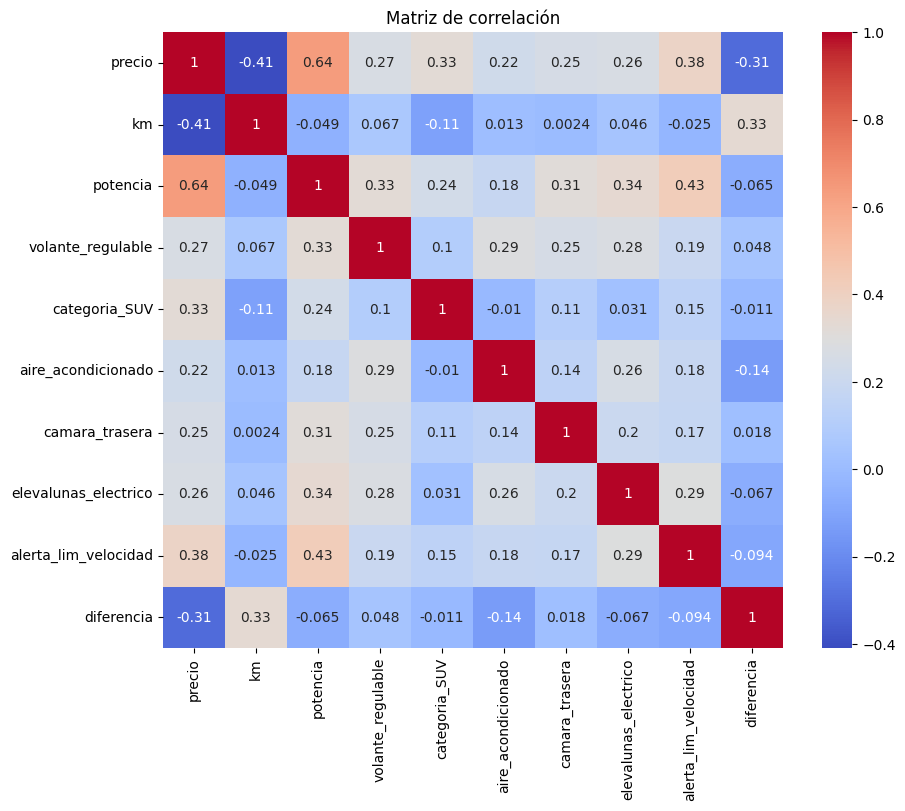

In [7594]:
# Utilizo las columnas que potencialmente más relación
# guardan con el precio en virtud del mapa de correlación anterior
columnas = ['precio', 'km', 'potencia', 'volante_regulable', 'categoria_SUV', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'alerta_lim_velocidad','diferencia']
df_seleccionado = df_bmw_encoded[columnas]

# Calcular la matriz de correlación
corr1 = df_seleccionado.corr()

#Graficar la matriz de correlación con cmap="coolwarm"
plt.figure(figsize=(10, 8))
sns.heatmap(corr1, cmap="coolwarm", annot=True)
plt.title('Matriz de correlación')
plt.show()


### Apilación de matriz de correlación y orden de valores

In [7595]:
# Aquí intento calcular la matriz de correlación del DataFrame
# "df_bmw_encoded" utilizando corr(). A su vez, con base en lo que
# vimos en clase, la idea es apilar la matriz de correlación en un sólo 
# índice y luego ordernar los valores de forma descendente.
# Básicamente presento de otro modo la información de las correlaciones
# entre variables que calculé anteriormente
resultado_corr= df_bmw_encoded.corr().unstack().sort_values(ascending = False)


In [7596]:
# Convierto la Serie resultante en un DataFrame utilizando 
# "to_frame()" y a la vez lo reinicio con reset_index(). 
# Esto asigna índices numéricos a las filas y coloca los
# valores de correlación en una columna llamada "Correlation".
resultado_df= resultado_corr.to_frame().reset_index()


In [7597]:
# Renombra las columnas del DataFrame resultante como "Columna_1", 
# "Columna_2" y "Correlation" utilizando columns=['Columna_1', 
# 'Columna_2', 'Correlation'].
resultado_df.columns=['Columna_1','Columna_2','Correlation']

In [7598]:
# Propongo un filtrado para incluir solo las filas donde el valor
# absoluto de la correlación es menor a -0.4 y mayor a 0.4.
# A su vez, excluyo los valores min_max del resultado final porque
# es muy posible que se correlacionen con su respectiva variable
resultado_df2=resultado_df[(resultado_df['Correlation']<-0.4) | (resultado_df['Correlation']>0.4)]
resultado_df2 = resultado_df2[(~resultado_df2['Columna_1'].str.contains("minMax")) & (~resultado_df2['Columna_2'].str.contains("minMax"))]


In [7599]:
# Aquí filtro el dataframe que resulte para exlcluir aquellas
# filas donde la columna 1 es igual a la columna 2 y luego imprimo
# (con el to_string la idea es obtener una representación del
# dataframe en forma tabular)
print(resultado_df2[(resultado_df2['Columna_1']!=resultado_df2['Columna_2'])].to_string(index=False))

                  Columna_1                   Columna_2  Correlation
      tipo_gasolina_electro              categoria_BMWi     0.654382
             categoria_BMWi       tipo_gasolina_electro     0.654382
                   potencia                      precio     0.638645
                     precio                    potencia     0.638645
          categoria_Serie 1            tipo_coche_otros     0.556241
           tipo_coche_otros           categoria_Serie 1     0.556241
tipo_gasolina_hybrid_petrol              categoria_BMWi     0.533800
             categoria_BMWi tipo_gasolina_hybrid_petrol     0.533800
       alerta_lim_velocidad                    potencia     0.426164
                   potencia        alerta_lim_velocidad     0.426164
              categoria_SUV           categoria_Serie 3    -0.407737
          categoria_Serie 3               categoria_SUV    -0.407737
                         km                      precio    -0.408946
                     precio       

### Enseño las correlaciones más significativas que encontré

In [7600]:
# Como el output anterior no me pareció explicativo, ya que devuelve las correlaciones
# de las categorías que se crearon a partir del one hot encoder,
# decido filtrar las filas relacionadas con "precio" donde éste 
# se encuentra en la columna "Columna_1" y la columna "Columna_2" es 
# diferente de "precio", para evitar que se duplique la info. 
# Luego, selecciono y muestro las columnas relevantes ("Columna_1", "Columna_2" y "Correlation") para 
# desplegar las variables correlacionadas con "precio".
resultado_precio = resultado_df2[(resultado_df2['Columna_1'] == 'precio') & (resultado_df2['Columna_2'] != 'precio')]
print(resultado_precio[['Columna_1', 'Columna_2', 'Correlation']].to_string(index=False))

Columna_1 Columna_2  Correlation
   precio  potencia     0.638645
   precio        km    -0.408946


In [7601]:
# Hago una copia para conservar las que me interesan
df_bmw_encoded_final = df_bmw_encoded.copy()

In [7602]:
# Creo una lista con las columnas a eliminar para llevar al modelo final
# aquellas columnas que están escaladas
columnas_eliminar = df_bmw_encoded_final.columns[df_bmw_encoded_final.columns.get_loc('km'):df_bmw_encoded.columns.get_loc('diferencia')+1]

# Elimino las columnas que no están escaladas del dataframe final
df_final = df_bmw_encoded_final.drop(columns=columnas_eliminar)
print(df_final)


      precio  tipo_gasolina_Diesel  tipo_gasolina_electro   
0      11300                 False                  False  \
1      69700                 False                  False   
2      10200                 False                  False   
3      25100                 False                  False   
4      33400                 False                  False   
...      ...                   ...                    ...   
4838   14600                 False                  False   
4839   17500                 False                  False   
4840   17000                 False                  False   
4841   22700                 False                  False   
4842   15500                 False                  False   

      tipo_gasolina_hybrid_petrol  tipo_gasolina_petrol  color_black   
0                           False                 False         True  \
1                           False                  True        False   
2                           False                 F

In [7603]:
df_final.columns


Index(['precio', 'tipo_gasolina_Diesel', 'tipo_gasolina_electro',
       'tipo_gasolina_hybrid_petrol', 'tipo_gasolina_petrol', 'color_black',
       'color_blue', 'color_grey', 'color_others', 'tipo_coche_Desconocido',
       'tipo_coche_estate', 'tipo_coche_otros', 'tipo_coche_sedan',
       'categoria_BMWi', 'categoria_Deportivo', 'categoria_SUV',
       'categoria_Serie 1', 'categoria_Serie 2', 'categoria_Serie 3',
       'categoria_Serie 4', 'categoria_Serie 5', 'categoria_Serie 6',
       'categoria_Serie 7', 'categoria_Z line', 'minMax_km', 'minMax_potencia',
       'minMax_volante_regulable', 'minMax_aire_acondicionado',
       'minMax_camara_trasera', 'minMax_elevalunas_electrico',
       'minMax_bluetooth', 'minMax_gps', 'minMax_alerta_lim_velocidad',
       'minMax_diferencia'],
      dtype='object')

In [7604]:
# Convierto las columnas del one hot encoder a int para el modelo posterior
columnas_convertir = ['tipo_gasolina_Diesel', 'tipo_gasolina_petrol', 'tipo_gasolina_electro', 'categoria_Deportivo', 'tipo_gasolina_hybrid_petrol', 'color_black', 'color_blue', 'color_grey', 'color_others', 'tipo_coche_Desconocido', 'tipo_coche_estate', 'tipo_coche_otros', 'tipo_coche_sedan', 'categoria_BMWi', 'categoria_SUV', 'categoria_Serie 1', 'categoria_Serie 2', 'categoria_Serie 3', 'categoria_Serie 4', 'categoria_Serie 5', 'categoria_Serie 6', 'categoria_Serie 7', 'categoria_Z line']
df_final[columnas_convertir] = df_final[columnas_convertir].astype(int)

In [7605]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   precio                       4817 non-null   int32  
 1   tipo_gasolina_Diesel         4817 non-null   int32  
 2   tipo_gasolina_electro        4817 non-null   int32  
 3   tipo_gasolina_hybrid_petrol  4817 non-null   int32  
 4   tipo_gasolina_petrol         4817 non-null   int32  
 5   color_black                  4817 non-null   int32  
 6   color_blue                   4817 non-null   int32  
 7   color_grey                   4817 non-null   int32  
 8   color_others                 4817 non-null   int32  
 9   tipo_coche_Desconocido       4817 non-null   int32  
 10  tipo_coche_estate            4817 non-null   int32  
 11  tipo_coche_otros             4817 non-null   int32  
 12  tipo_coche_sedan             4817 non-null   int32  
 13  categoria_BMWi         

### Dataset final con todas las variables a escala y pickle

In [7606]:
df_final.head()

,precio,tipo_gasolina_Diesel,tipo_gasolina_electro,tipo_gasolina_hybrid_petrol,tipo_gasolina_petrol,color_black,color_blue,color_grey,color_others,tipo_coche_Desconocido,...,minMax_km,minMax_potencia,minMax_volante_regulable,minMax_aire_acondicionado,minMax_camara_trasera,minMax_elevalunas_electrico,minMax_bluetooth,minMax_gps,minMax_alerta_lim_velocidad,minMax_diferencia
0,11300,0,0,0,0,1,0,0,0,1,...,0.139949,0.236407,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.193767
1,69700,0,0,0,1,0,0,1,0,0,...,0.013454,0.749409,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.145474
2,10200,0,0,0,0,0,0,0,1,1,...,0.182839,0.283688,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.190879
3,25100,0,0,0,0,0,0,0,1,0,...,0.127572,0.319149,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.145474
4,33400,0,0,0,0,0,0,0,1,1,...,0.096631,0.378251,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.151349


In [7607]:
# Guardo el dataframe en un objeto de tipo pickle
pd.to_pickle(df_final,"bmw.pickle")